In [18]:
import pandas as pd
import numpy as np
from itertools import chain
import ast

In [10]:
df_movie_metadata = pd.read_table('movie.metadata.tsv', header = None)

In [11]:
df_movie_metadata.columns = ['wiki_id', 'freebase_id', 'movie_name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']

In [12]:
df_movie_metadata.head()

wiki_id freebase_id                                         movie_name  \
0    975900   /m/03vyhn                                     Ghosts of Mars   
1   3196793   /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2  28463795  /m/0crgdbh                                        Brun bitter   
3   9363483  /m/0285_cd                                   White Of The Eye   
4    261236   /m/01mrr1                                  A Woman in Flames   

  release_date  box_office_revenue  runtime  \
0   2001-08-24          14010832.0     98.0   
1   2000-02-16                 NaN     95.0   
2         1988                 NaN     83.0   
3         1987                 NaN    110.0   
4         1983                 NaN    106.0   

                            languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                                   countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                              genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [14]:
#in the genres column I would like to list all the distinct elements the problem is that the elements are lists of dictionaries

df_movie_metadata['genres'].head()


0    {"/m/01jfsb": "Thriller", "/m/06n90": "Science...
1    {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...
2    {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...
3    {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...
4                              {"/m/07s9rl0": "Drama"}
Name: genres, dtype: object

In [19]:
def extract_genres(genre_str):
    genre_dict = ast.literal_eval(genre_str)
    return list(genre_dict.values())


genre_lists_series = df_movie_metadata['genres'].apply(extract_genres)

unique_genres = set(chain.from_iterable(genre_lists_series))



In [20]:
print(unique_genres)

{'Anime', 'Latino', 'Spaghetti Western', 'Religious Film', 'Fantasy Drama', 'Fan film', 'Biography', 'Social problem film', 'Chase Movie', 'Ealing Comedies', 'Western', 'Adventure', 'Historical Epic', 'History', 'Screwball comedy', 'Patriotic film', 'Bollywood', 'Adult', 'Biopic [feature]', 'Americana', 'Surrealism', 'Punk rock', 'Goat gland', 'World cinema', 'Animated cartoon', 'Gothic Film', 'Singing cowboy', 'Nature', "Children's Entertainment", 'News', 'Film & Television History', 'Inspirational Drama', 'Japanese Movies', "Children's Fantasy", 'Alien invasion', 'Family-Oriented Adventure', "Children's/Family", 'Race movie', 'Glamorized Spy Film', 'Homoeroticism', 'Detective fiction', 'Psychological horror', 'Breakdance', 'Slapstick', 'Stoner film', 'Giallo', 'Sword and sorcery films', 'Alien Film', 'Political drama', 'Linguistics', 'Chinese Movies', 'Melodrama', 'Supermarionation', 'Computer Animation', 'Music', 'Rockumentary', 'Hip hop movies', 'Nuclear warfare', 'Crime Drama', 'C

In [ ]:
df_movie_metadata.groupby('release_date').apply(extract_genres)

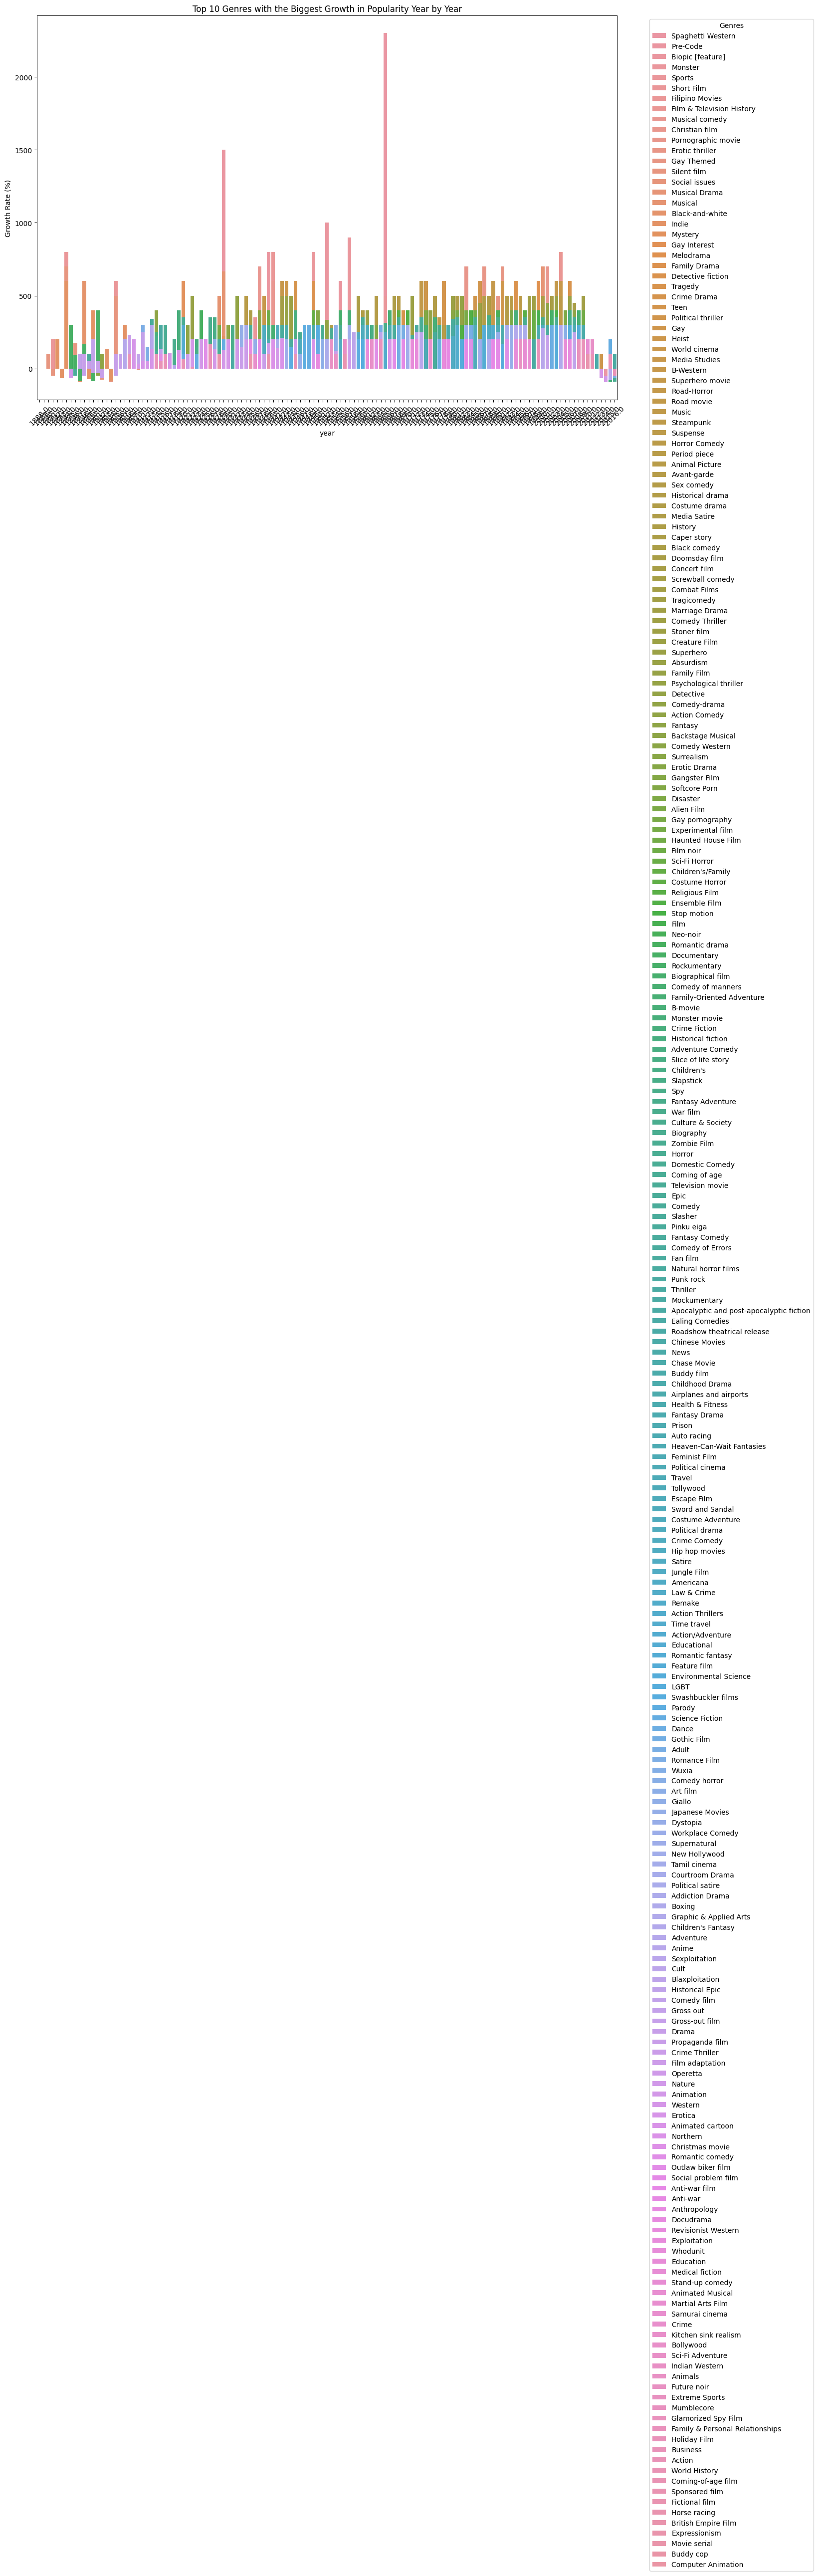

In [22]:
#Now I want to do the same thing but with only the years:
df_movie_metadata['year'] = pd.to_datetime(df_movie_metadata['release_date'], errors='coerce').dt.year
df_movie_metadata['genre_list'] = df_movie_metadata['genres'].apply(extract_genres)
df_exploded = df_movie_metadata.explode('genre_list')
genre_counts = df_exploded.groupby(['year', 'genre_list']).size().reset_index(name='counts')
genre_counts['growth'] = genre_counts.groupby('genre_list')['counts'].pct_change() * 100
top_genres = (genre_counts.sort_values('growth', ascending=False)
                          .groupby('year')
                          .head(10))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.barplot(data=top_genres, x='year', y='growth', hue='genre_list', dodge=False)
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 10 Genres with the Biggest Growth in Popularity Year by Year')
plt.ylabel('Growth Rate (%)')
plt.show()


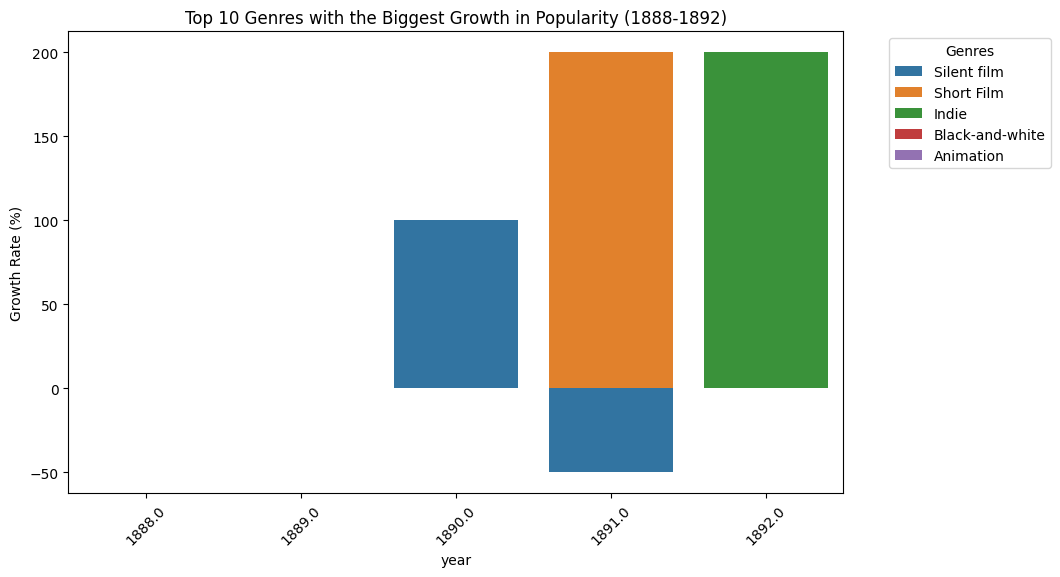

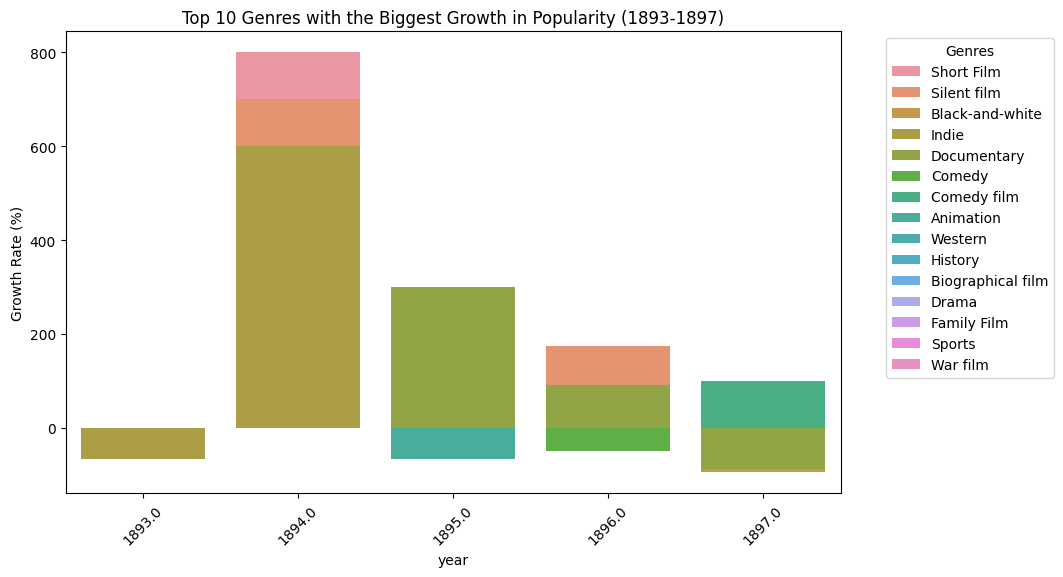

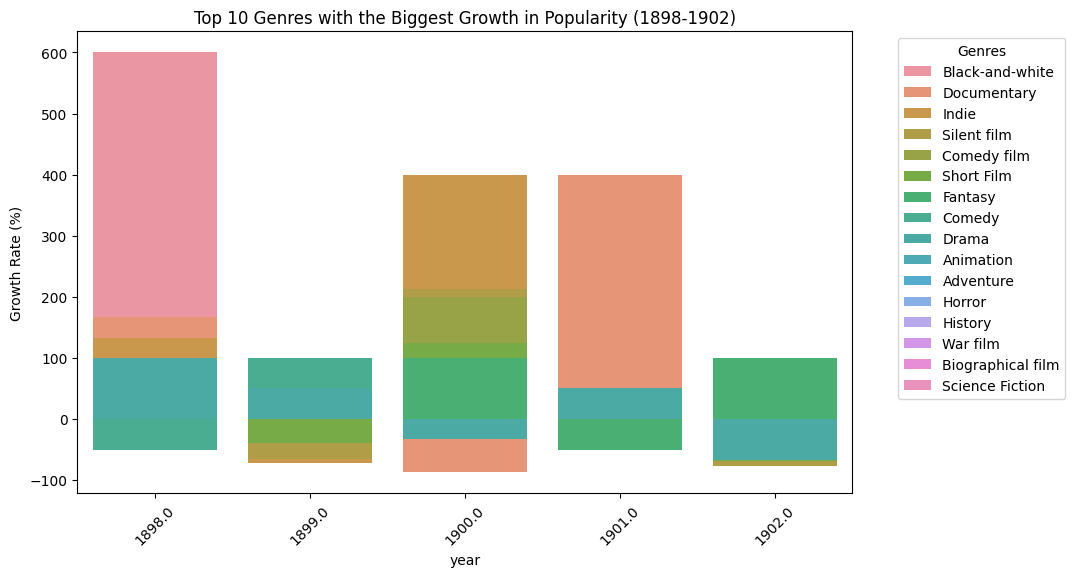

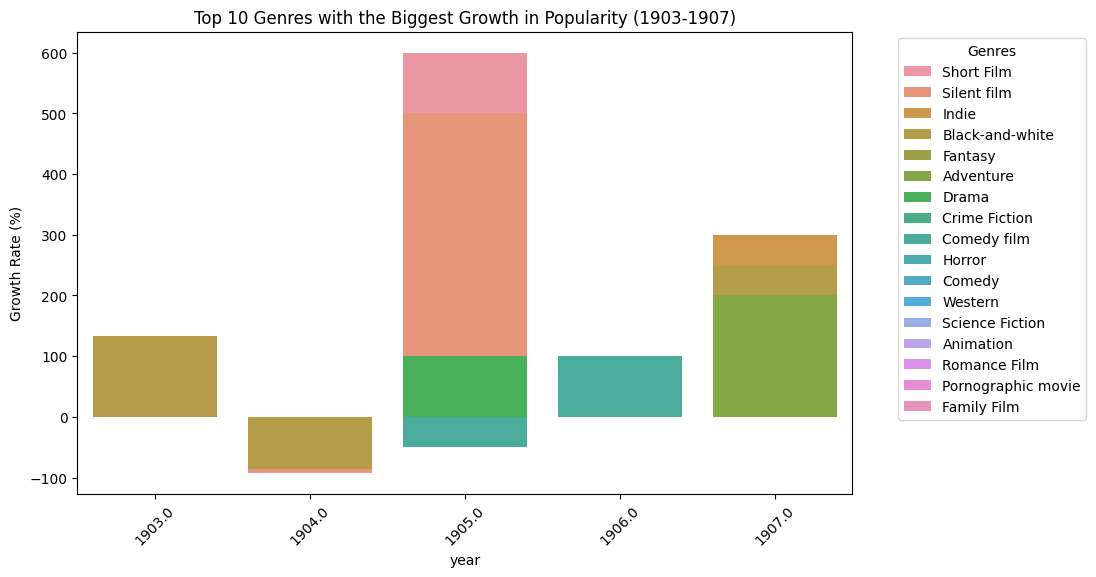

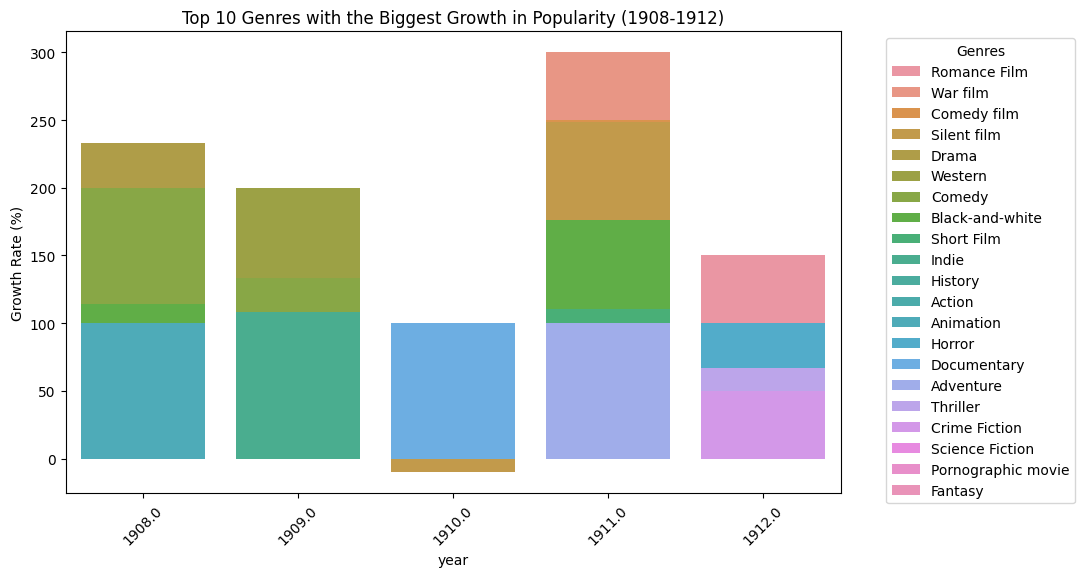

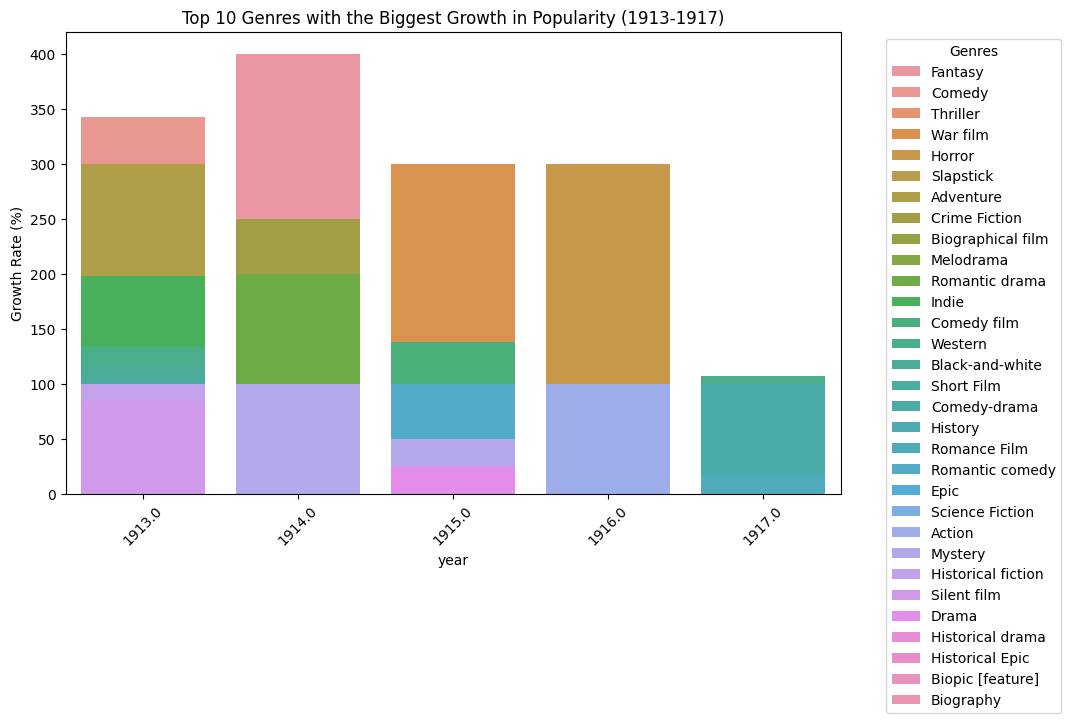

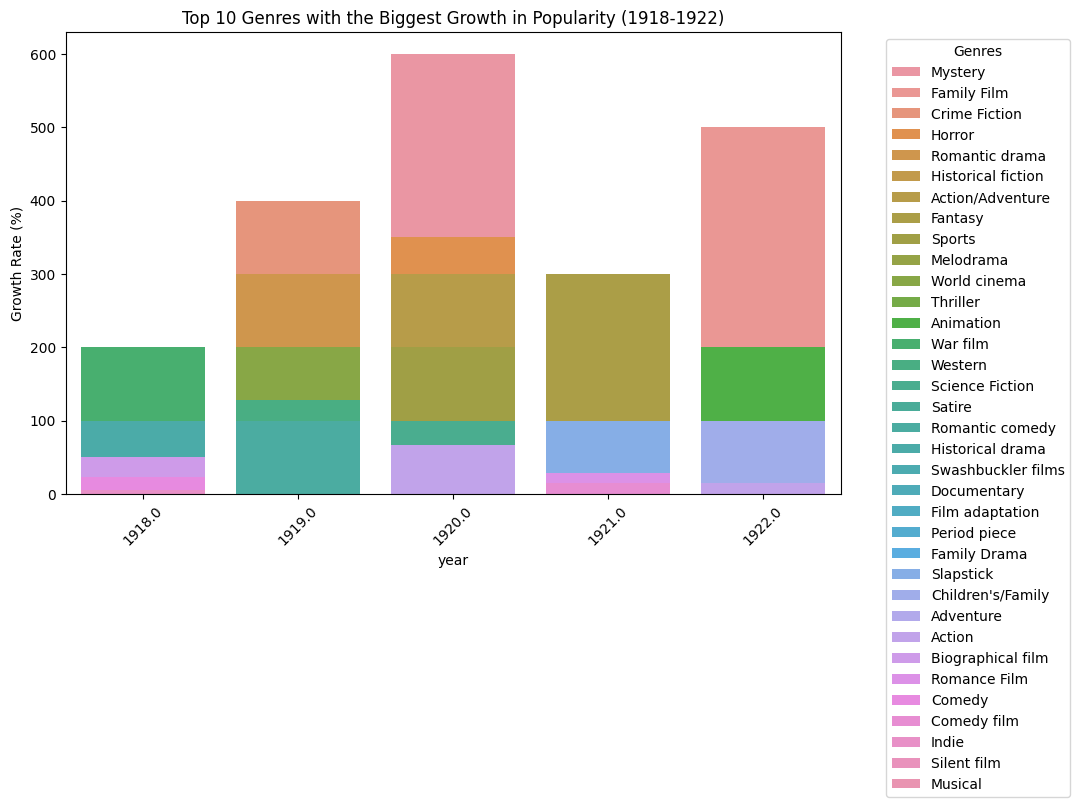

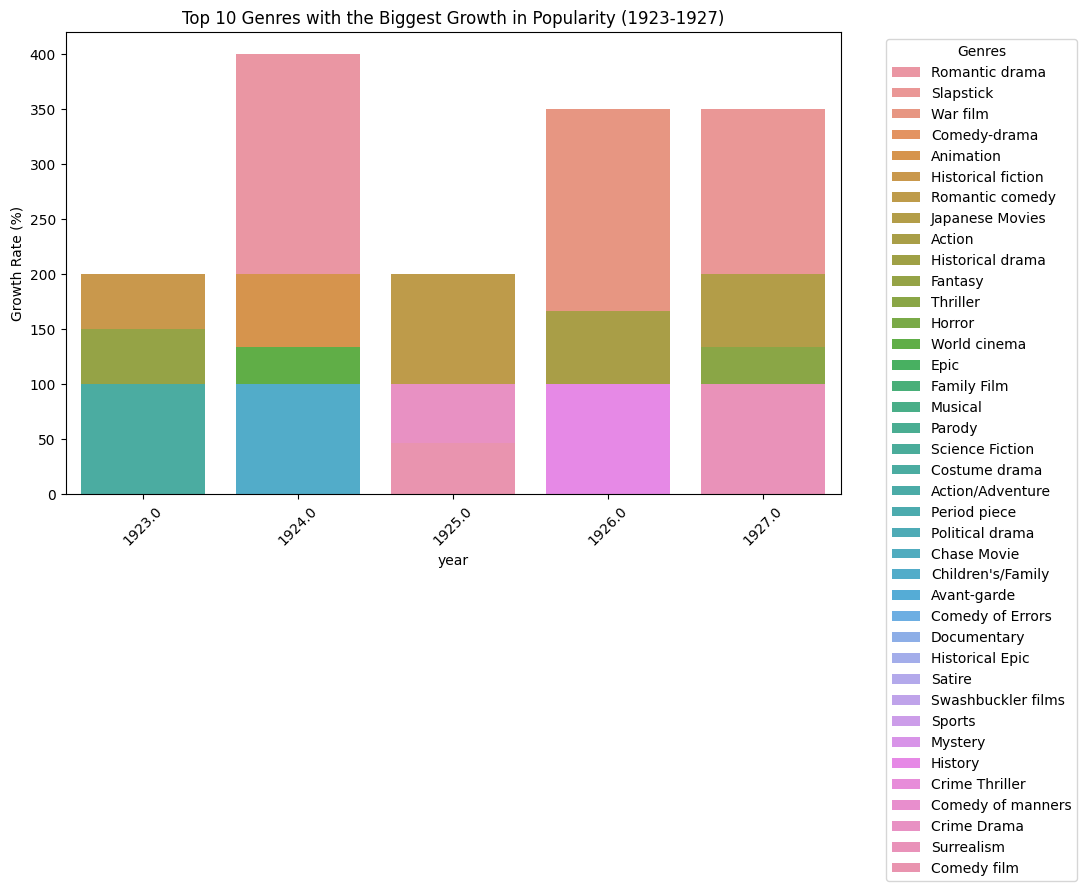

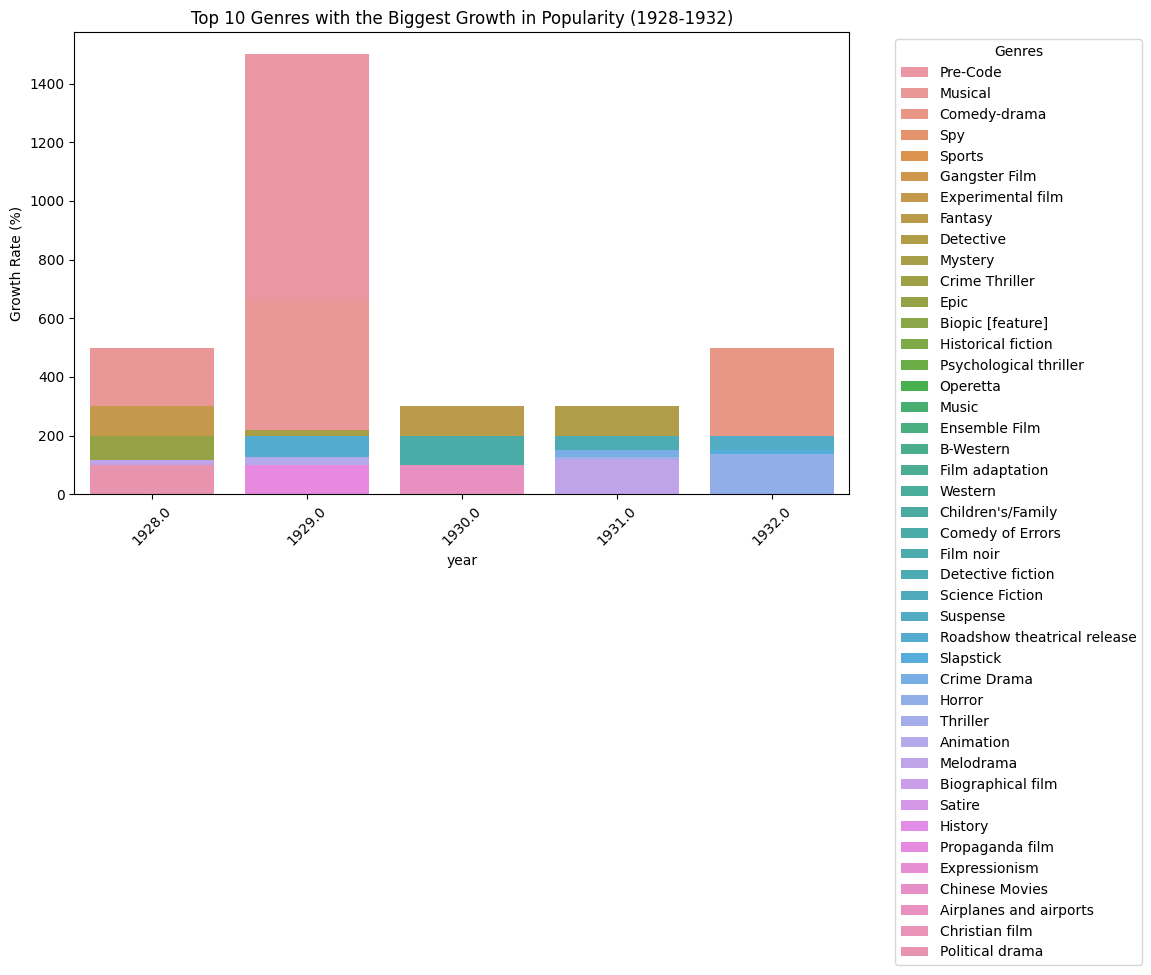

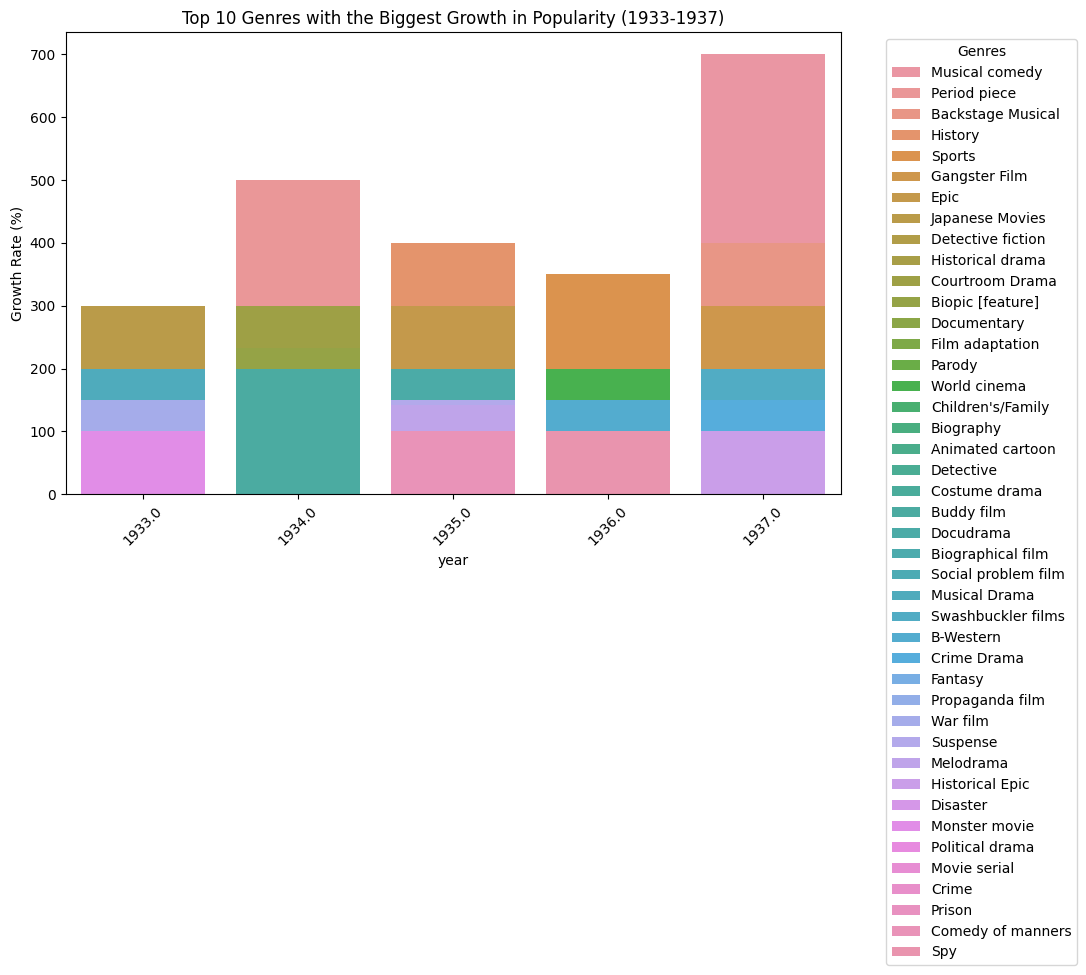

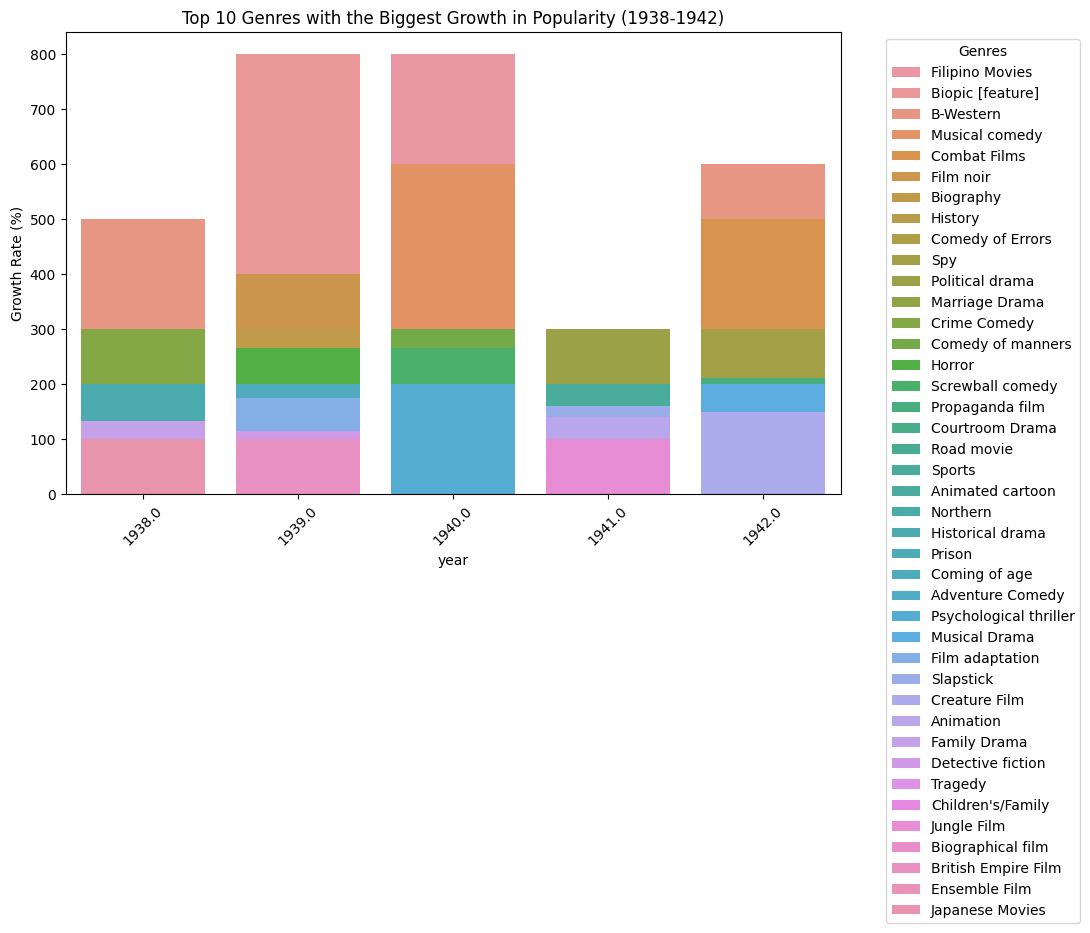

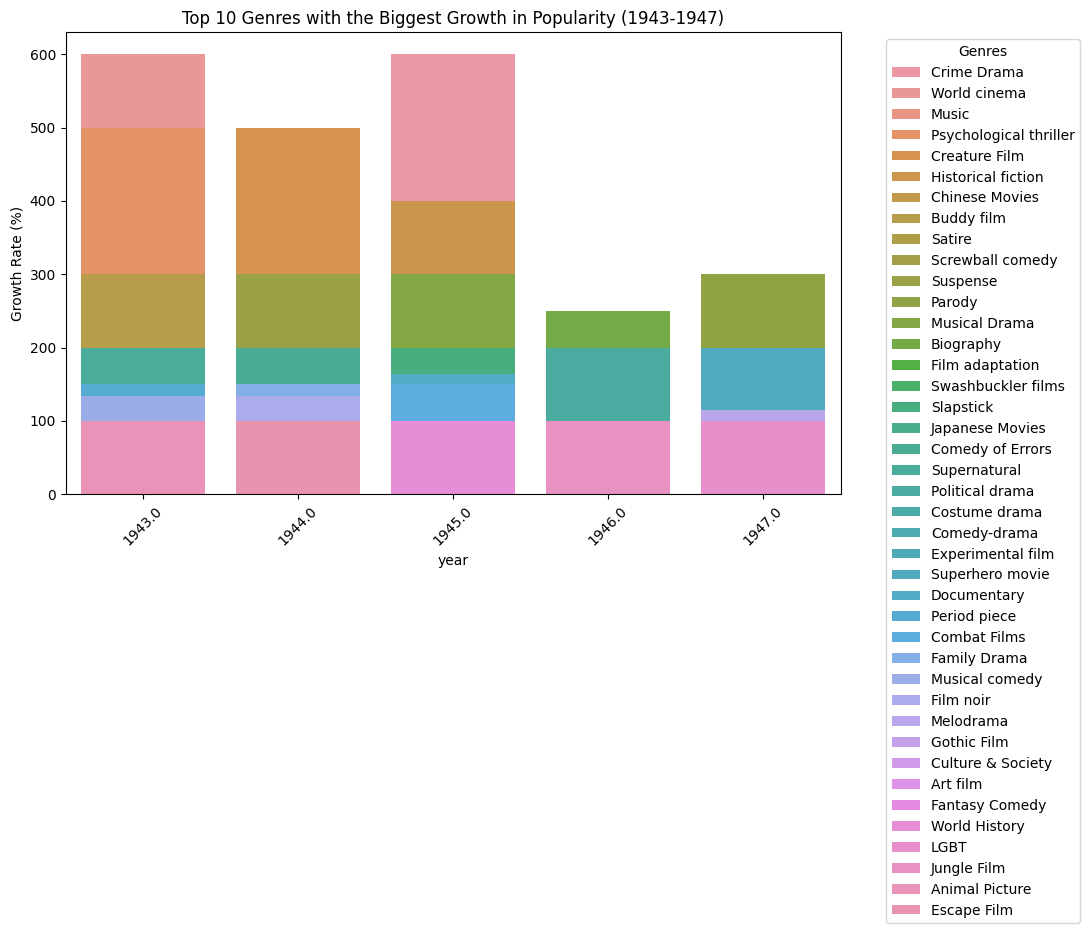

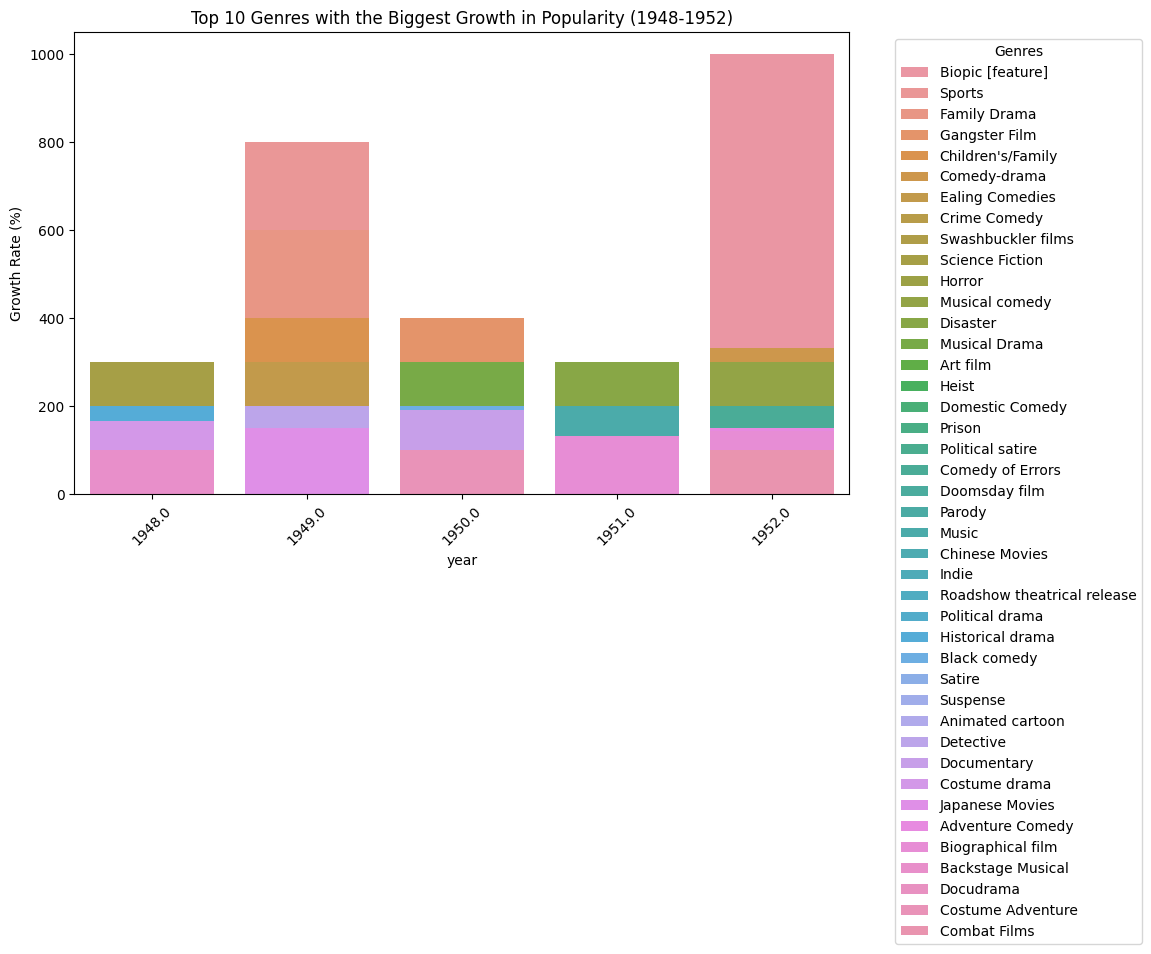

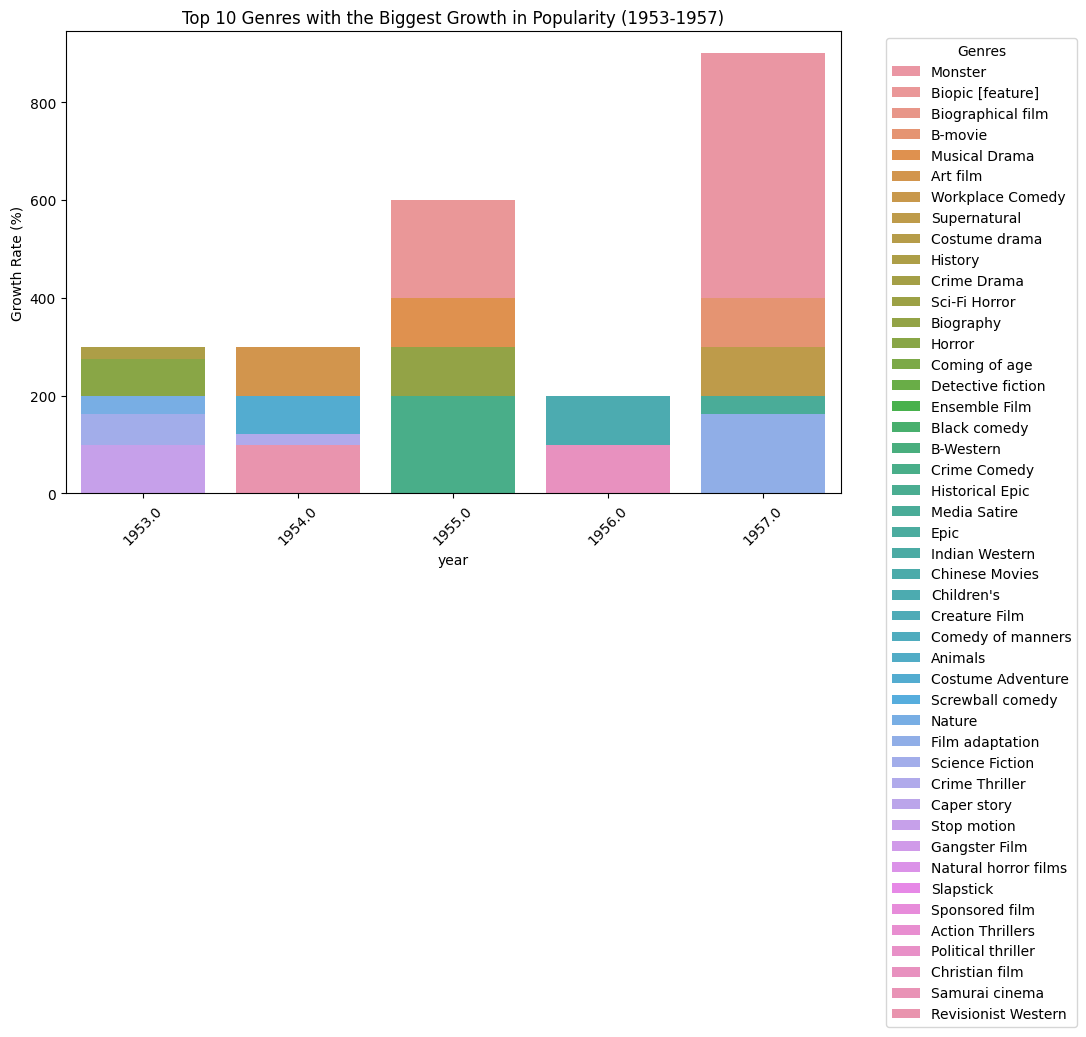

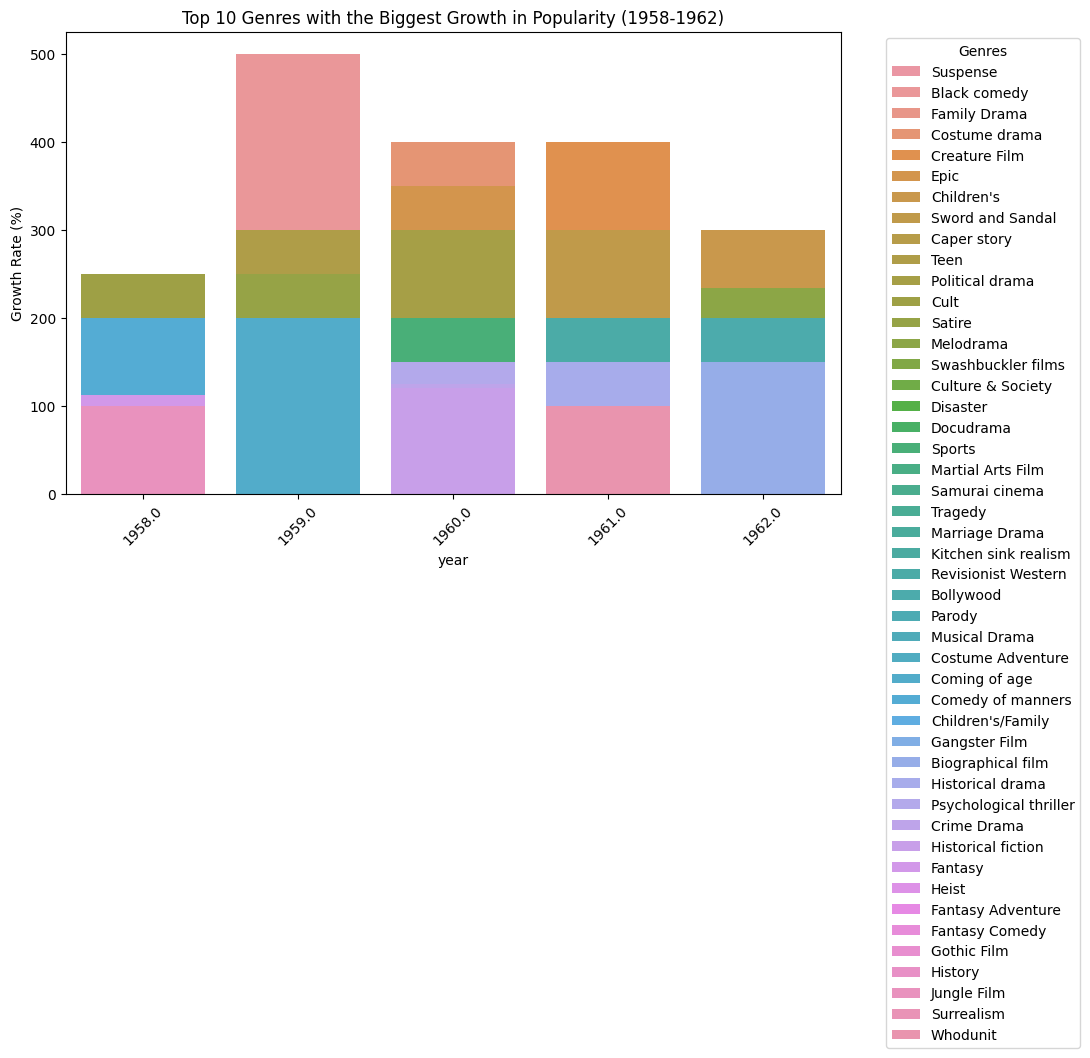

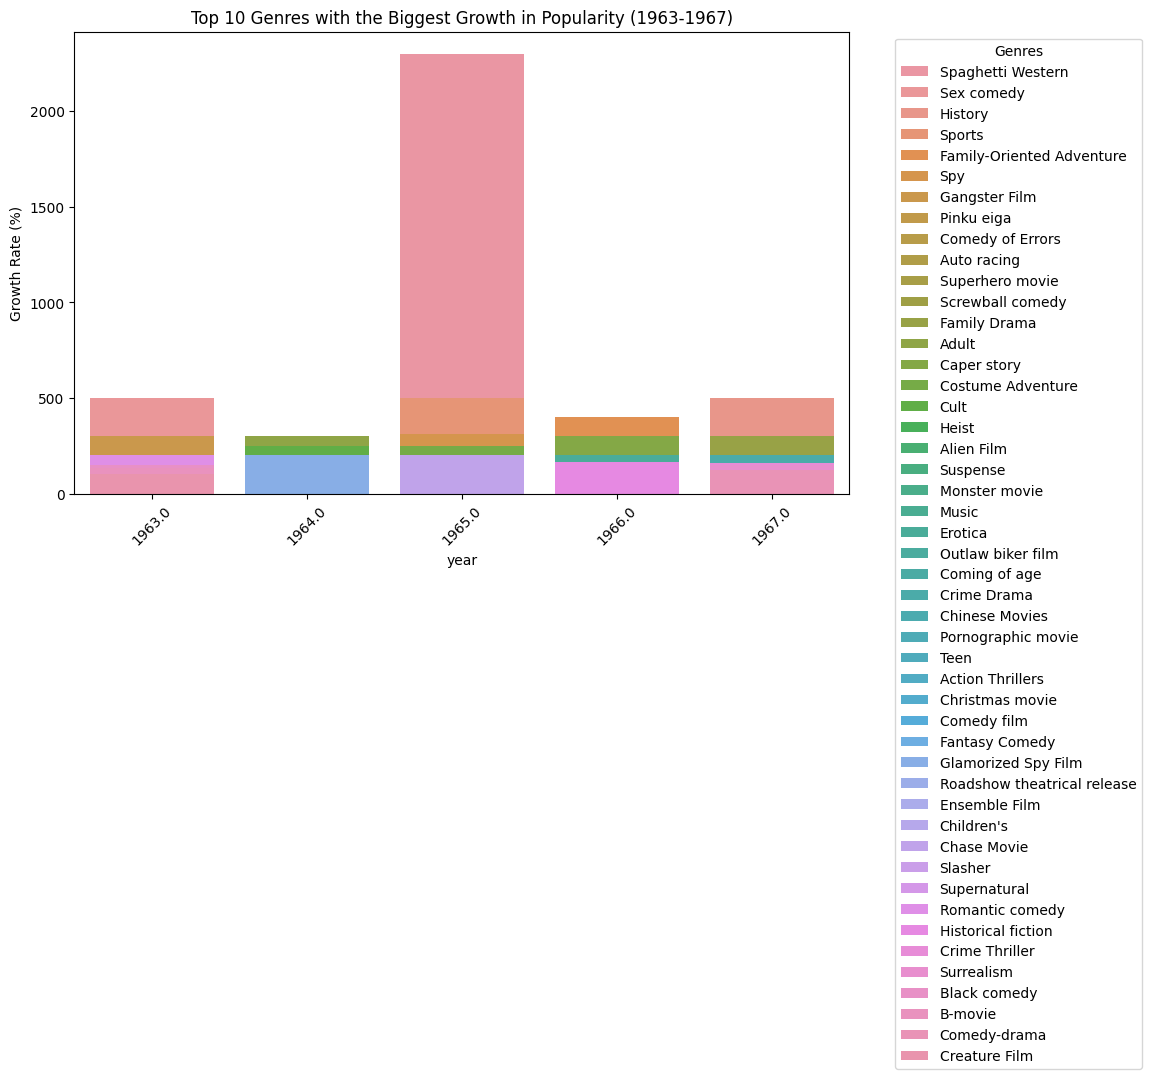

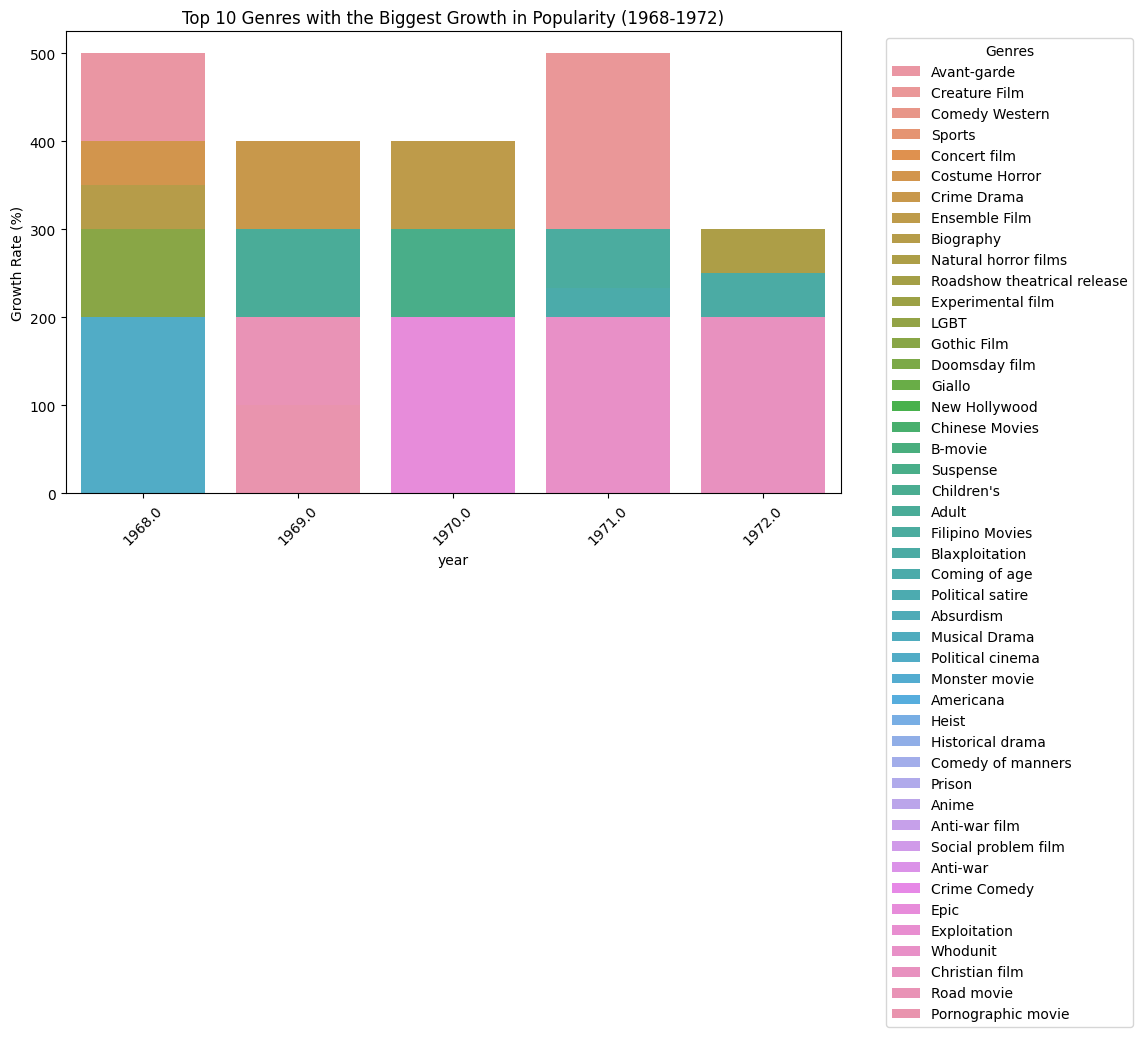

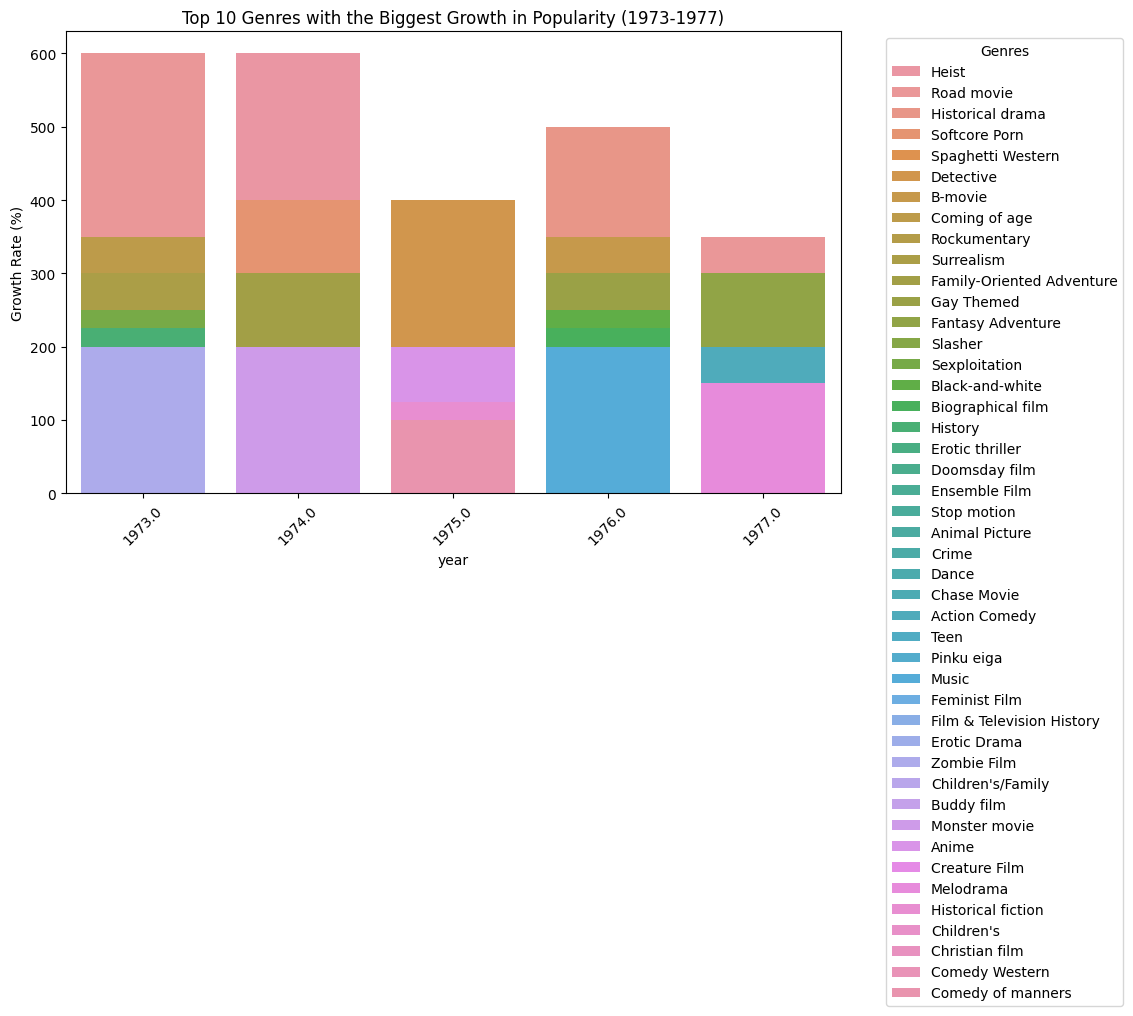

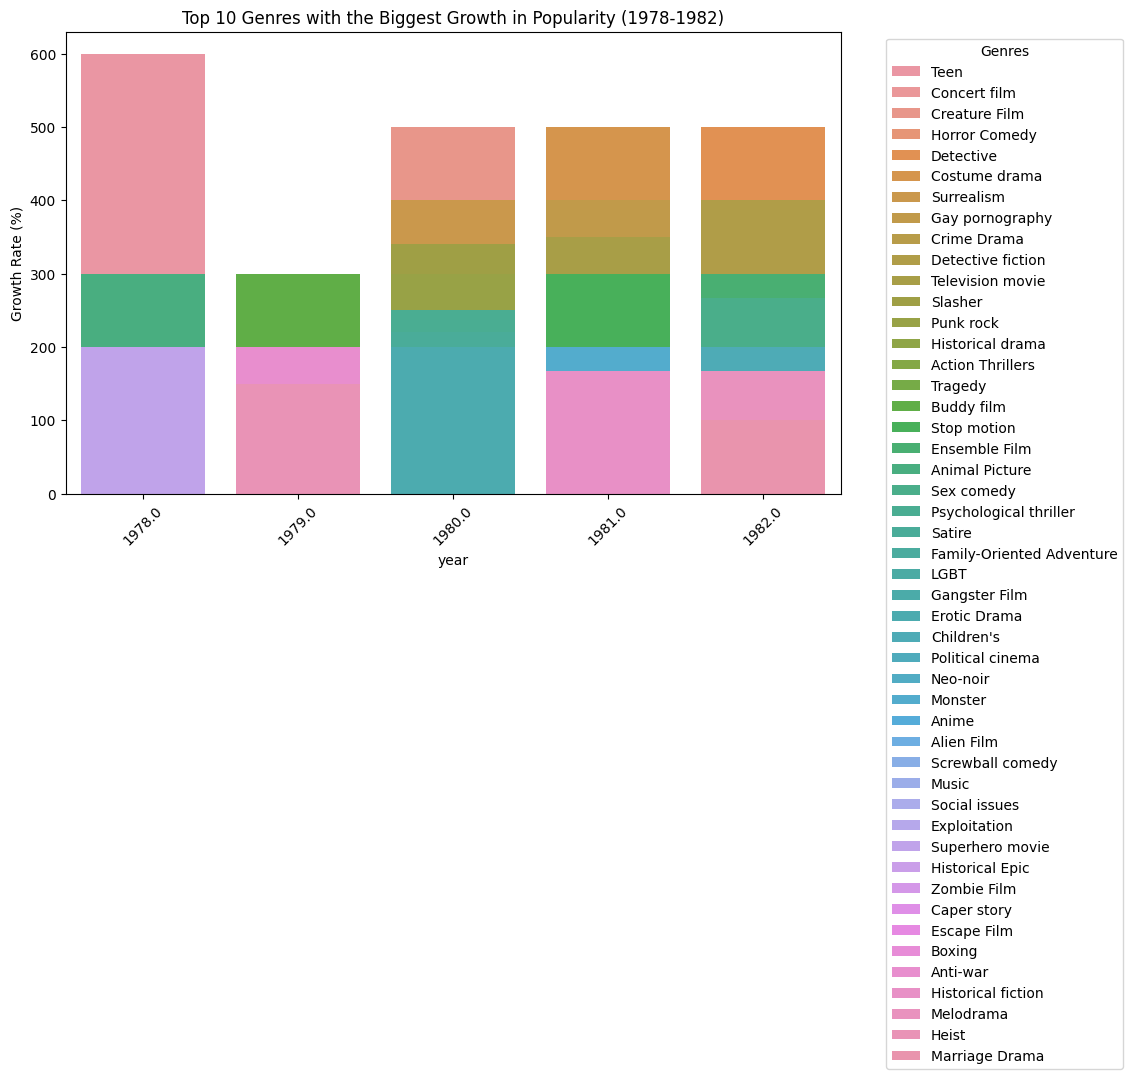

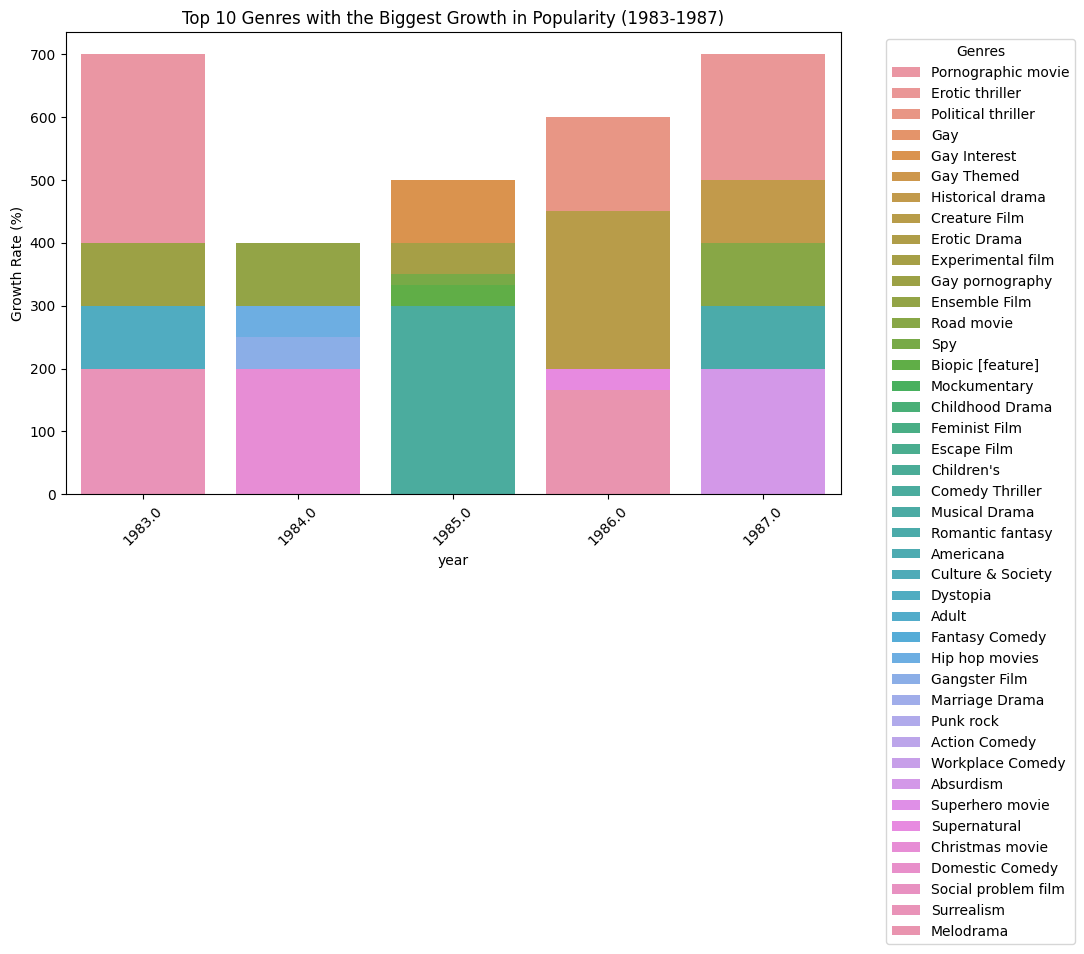

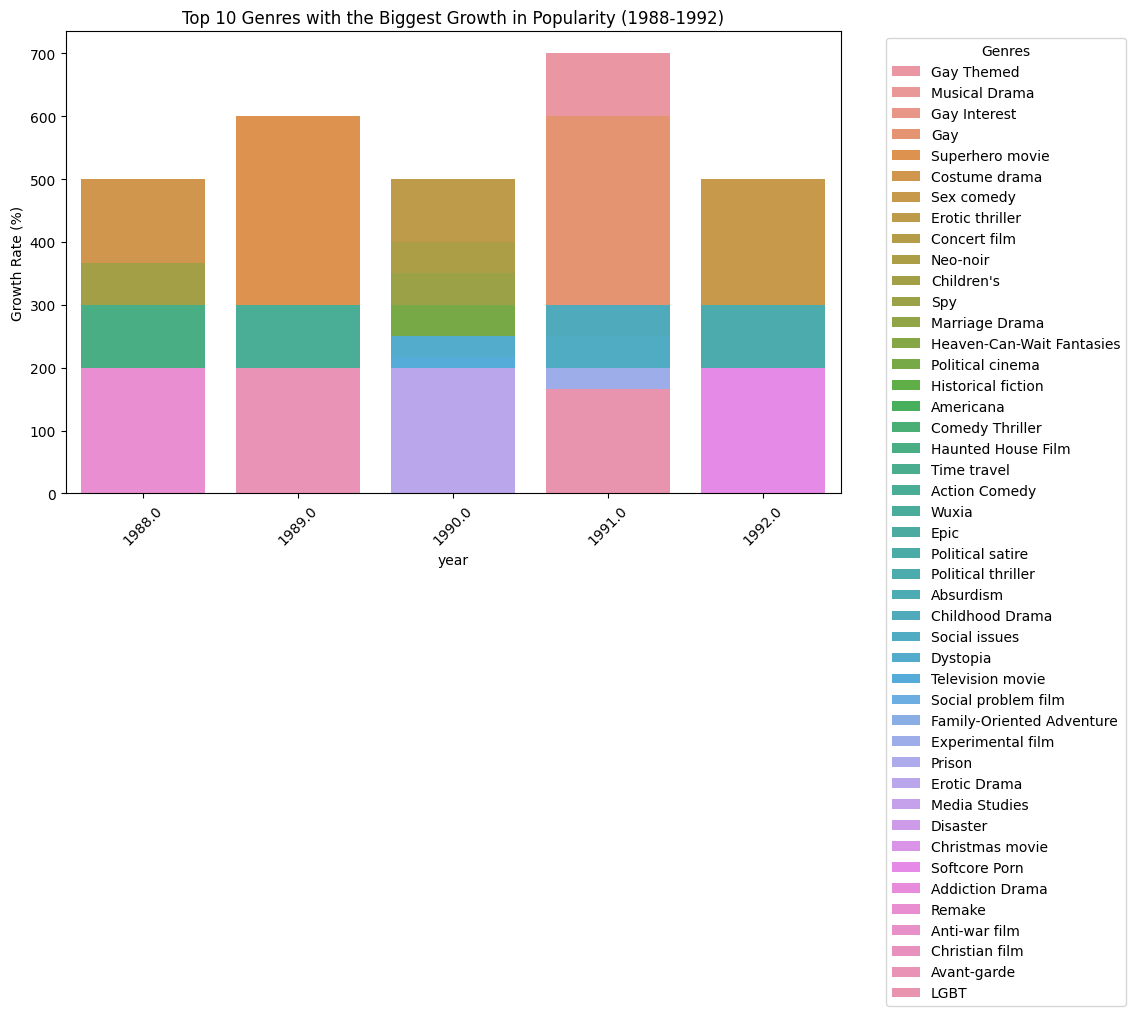

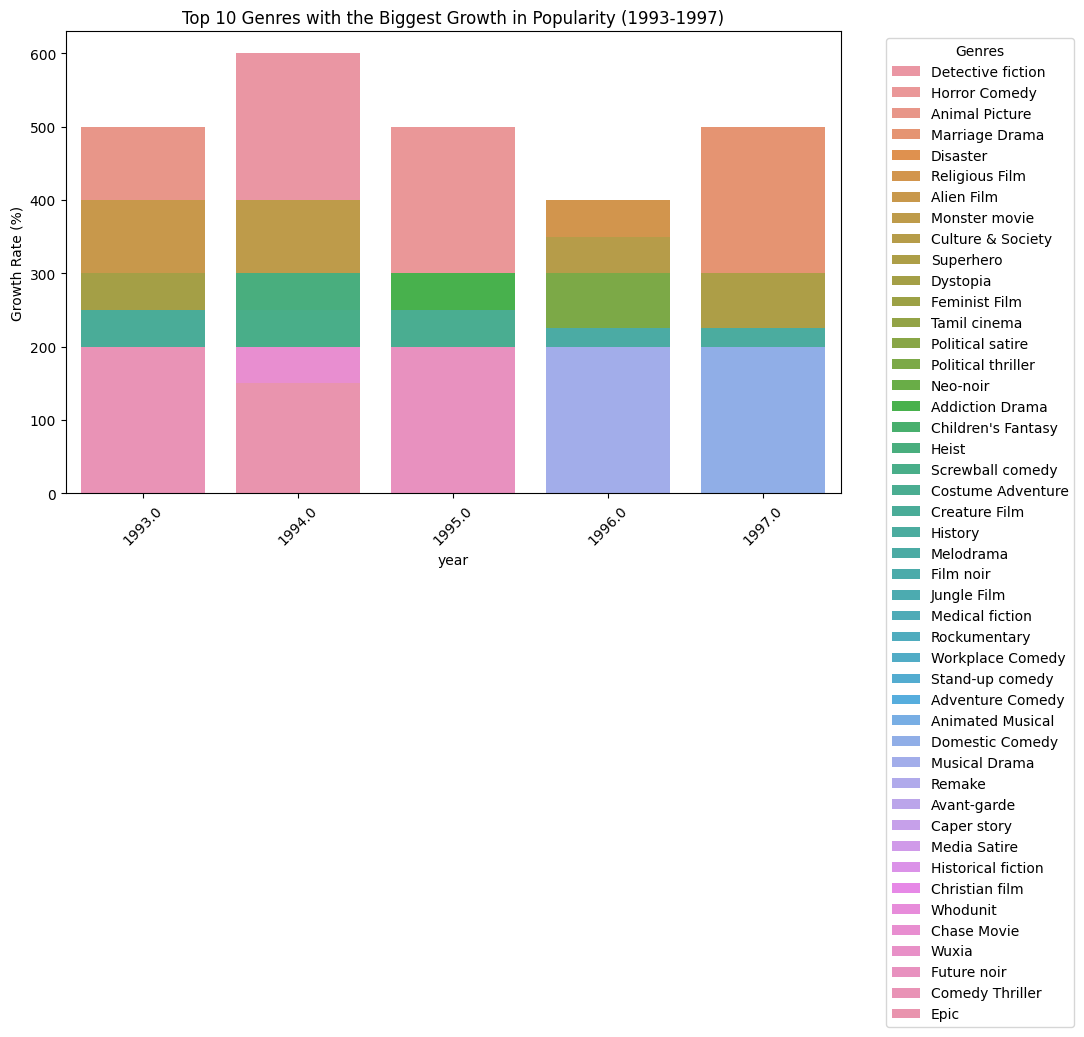

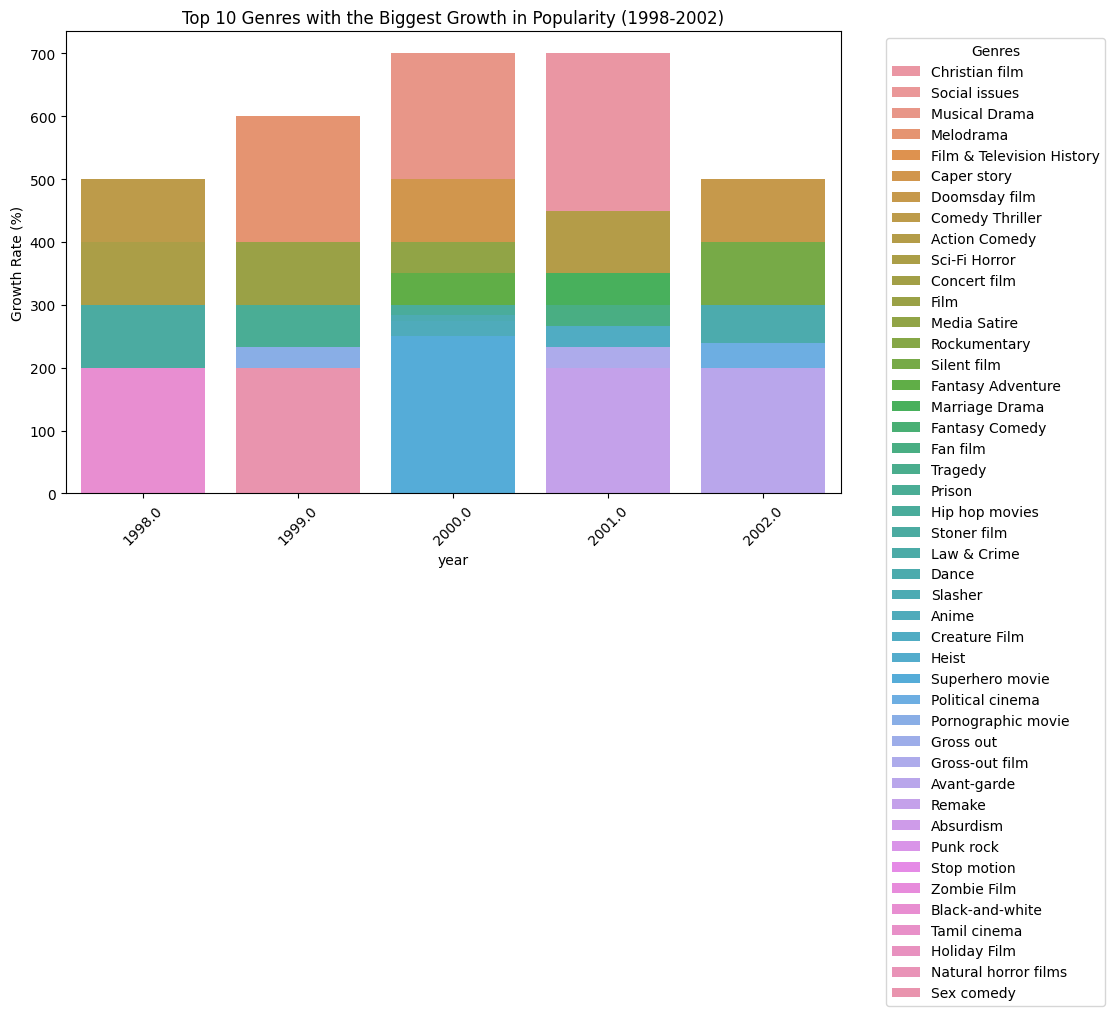

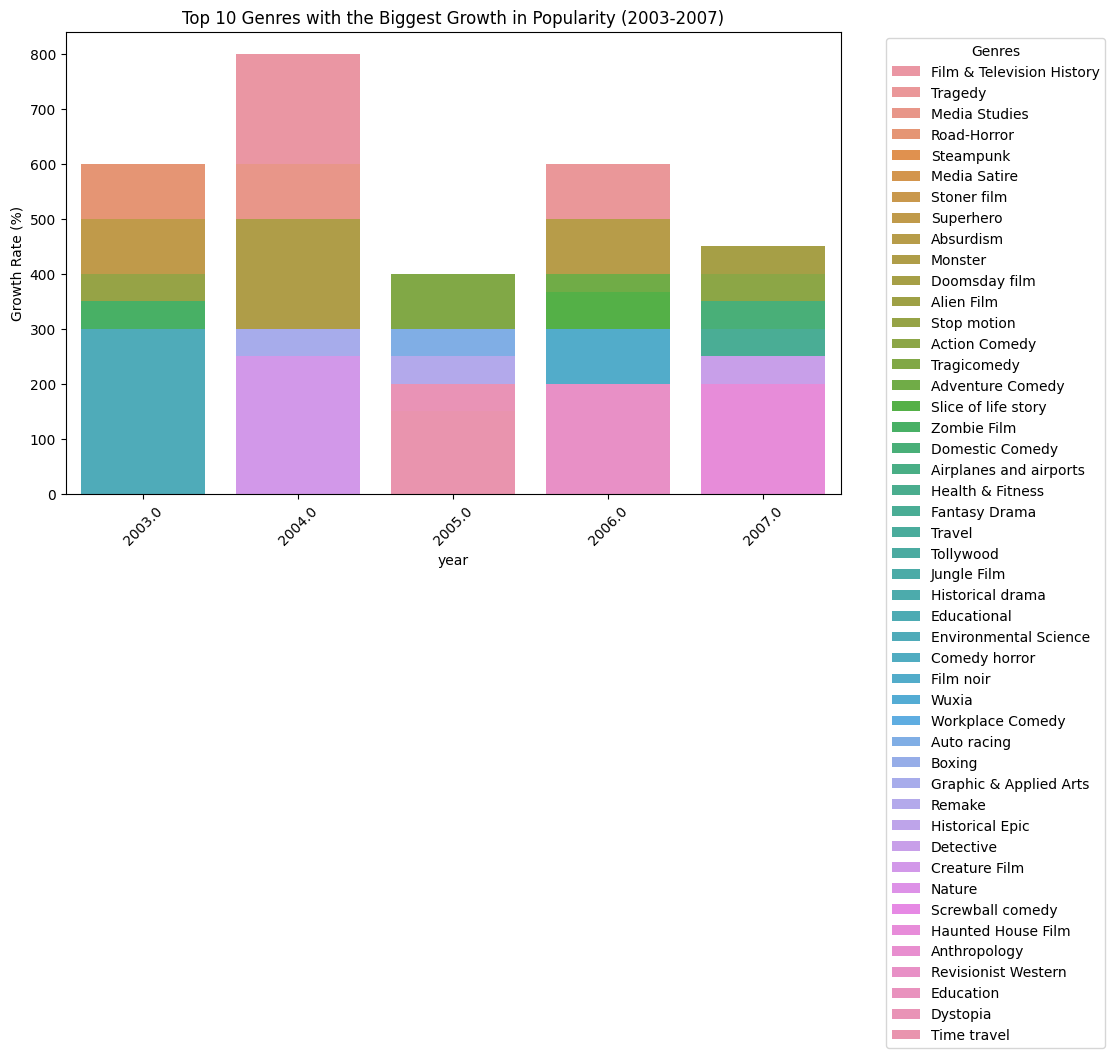

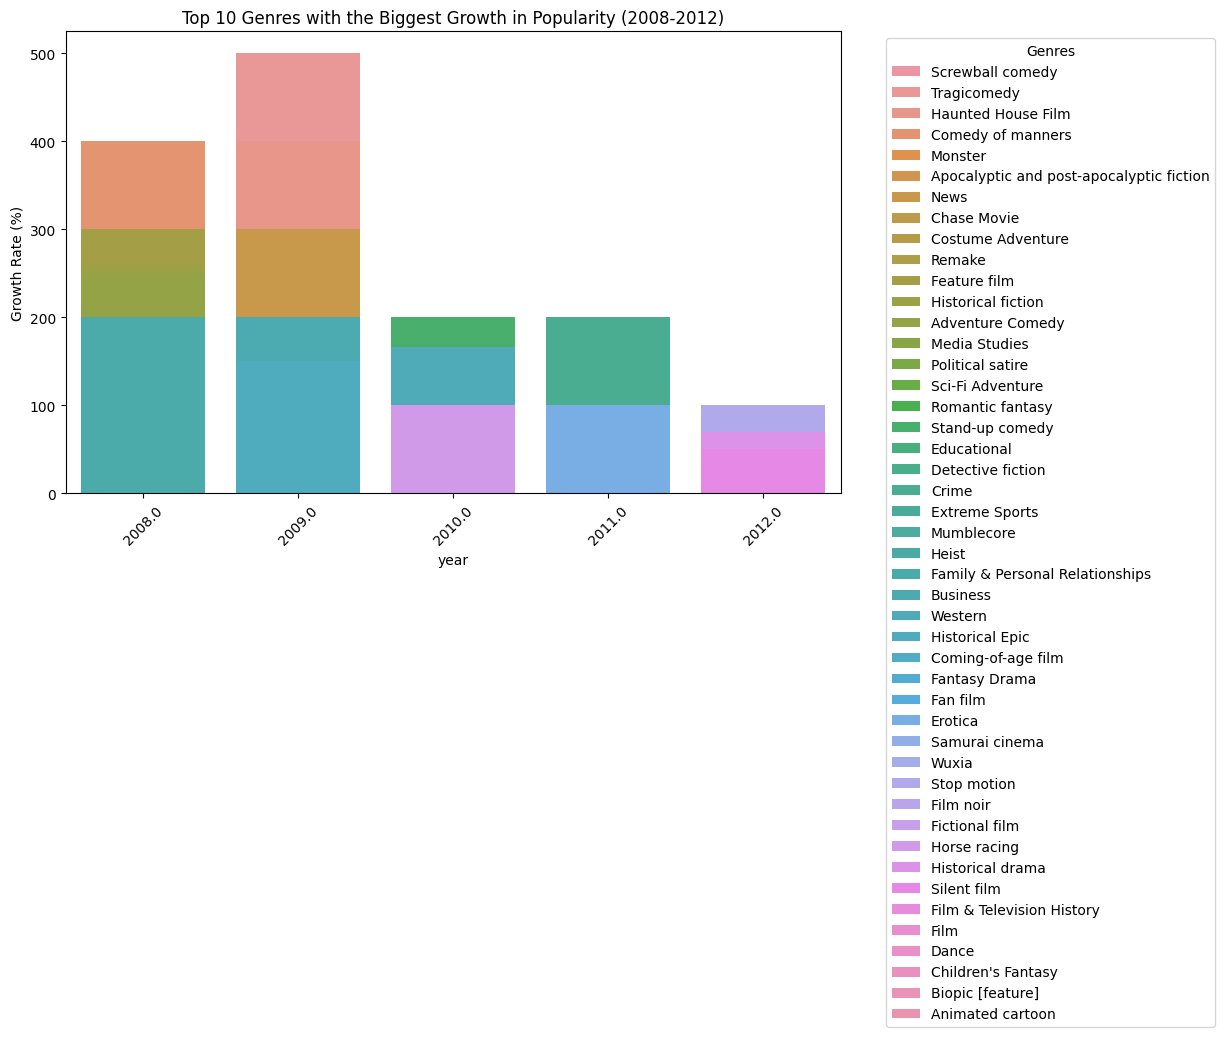

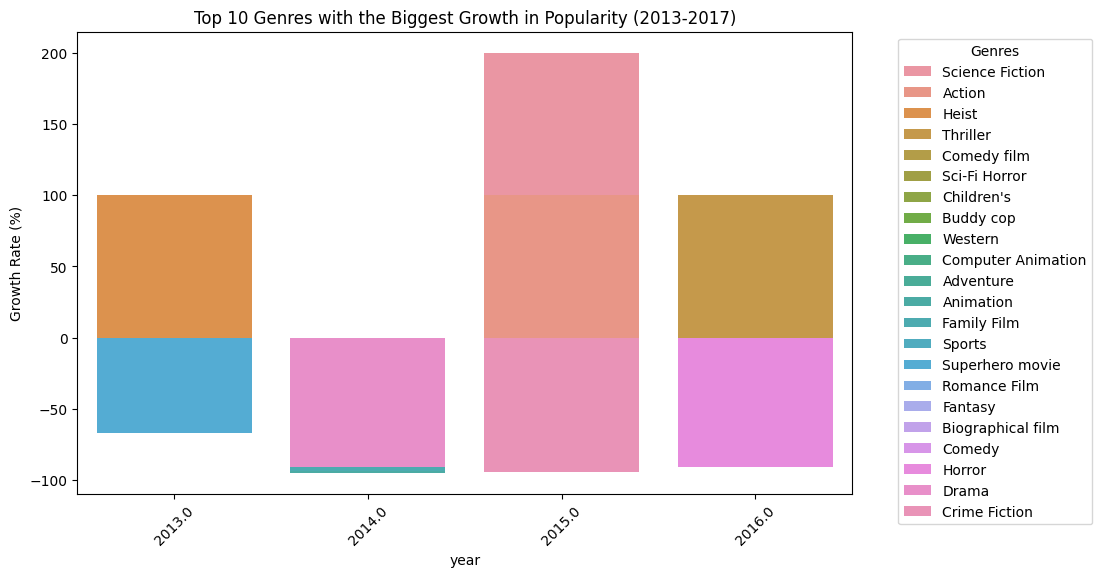

In [24]:
min_year = int(df_exploded['year'].min())
max_year = int(df_exploded['year'].max())
import matplotlib.pyplot as plt
import seaborn as sns

for start_year in range(min_year, max_year, 5):
    end_year = start_year + 4  # Define the end year of the interval
    # Filter the data for the current interval
    interval_data = top_genres[(top_genres['year'] >= start_year) & (top_genres['year'] <= end_year)]
    
    # Skip the iteration if there's no data for the current interval
    if interval_data.empty:
        continue
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=interval_data, x='year', y='growth', hue='genre_list', dodge=False)
    plt.xticks(rotation=45)
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Top 10 Genres with the Biggest Growth in Popularity ({start_year}-{end_year})')
    plt.ylabel('Growth Rate (%)')
    plt.show()


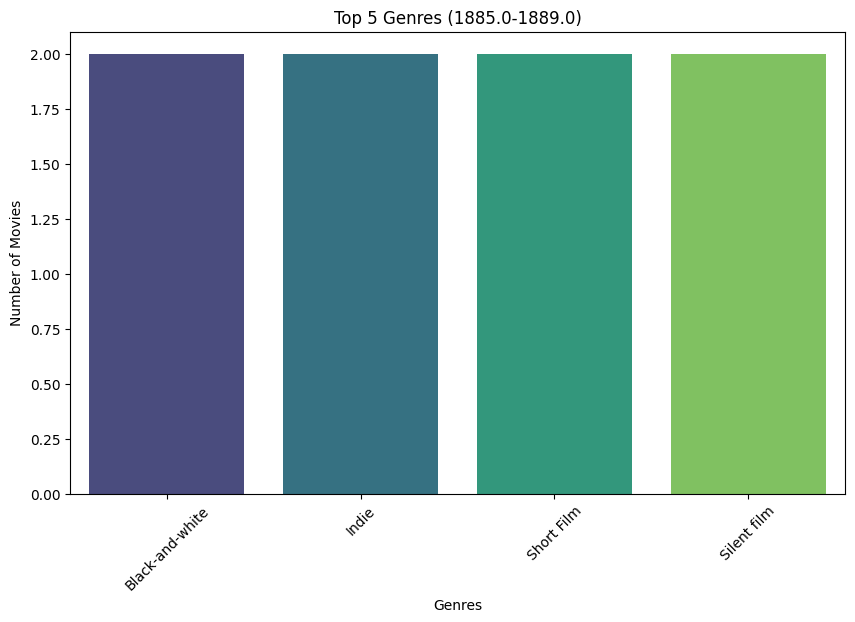

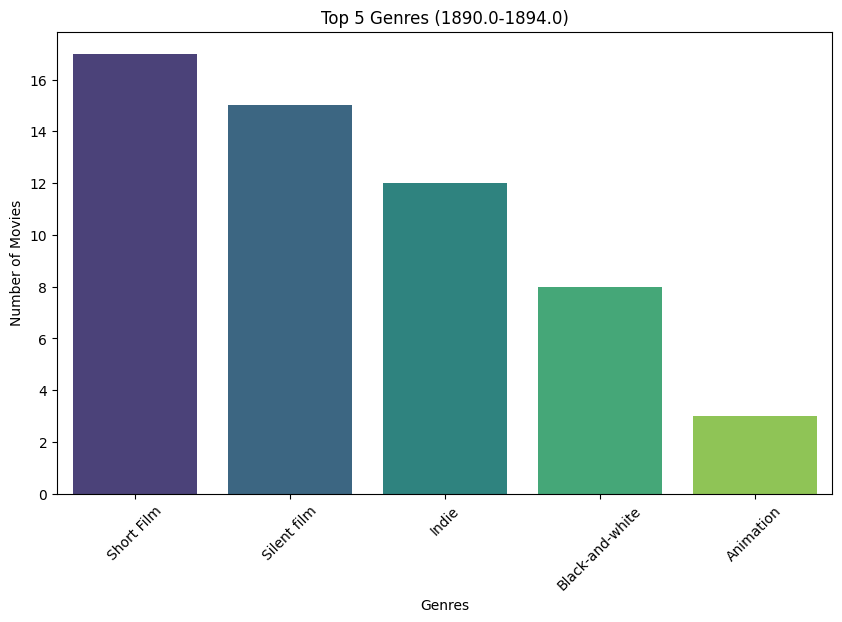

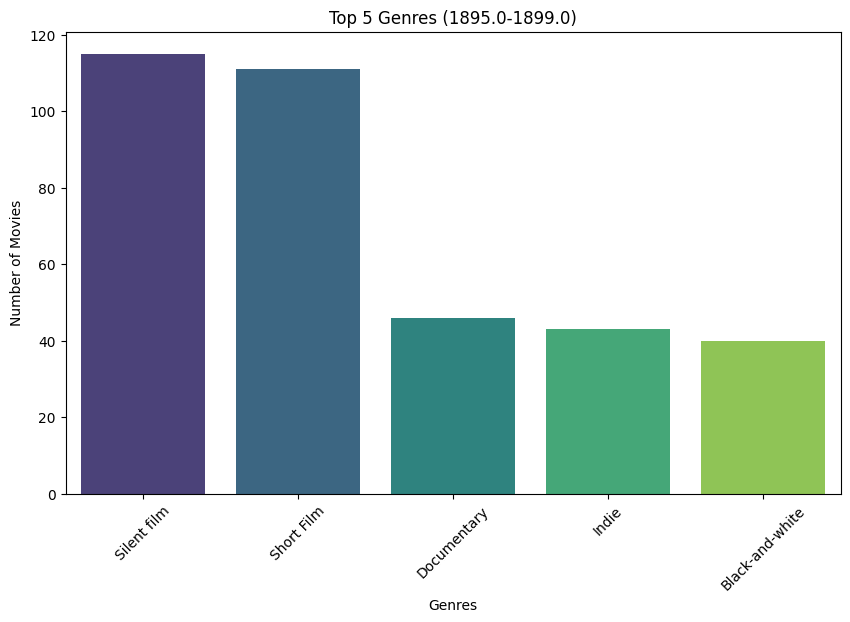

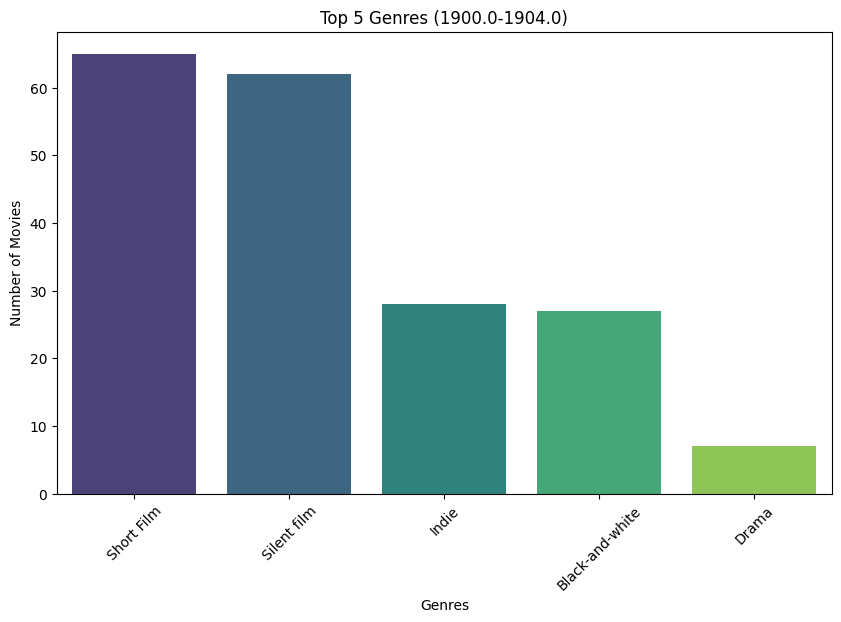

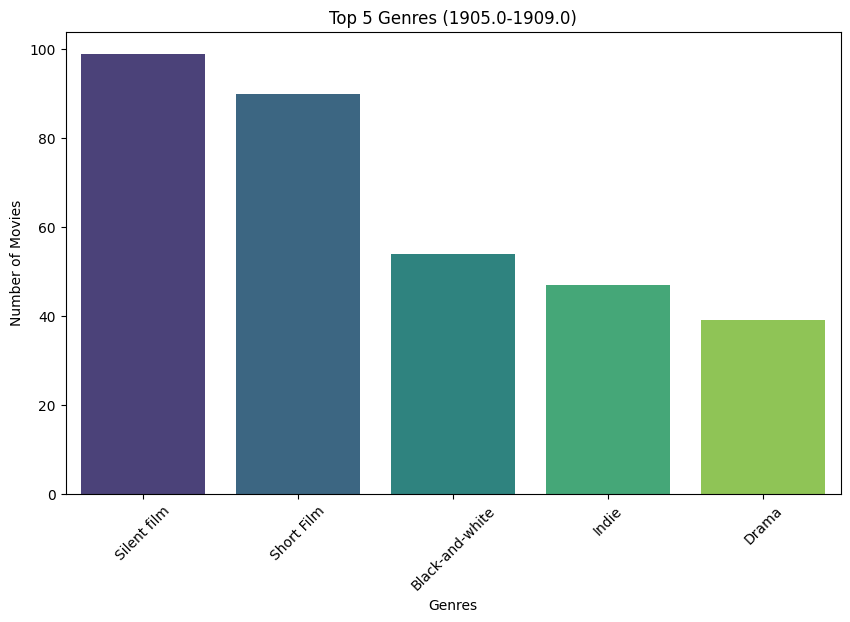

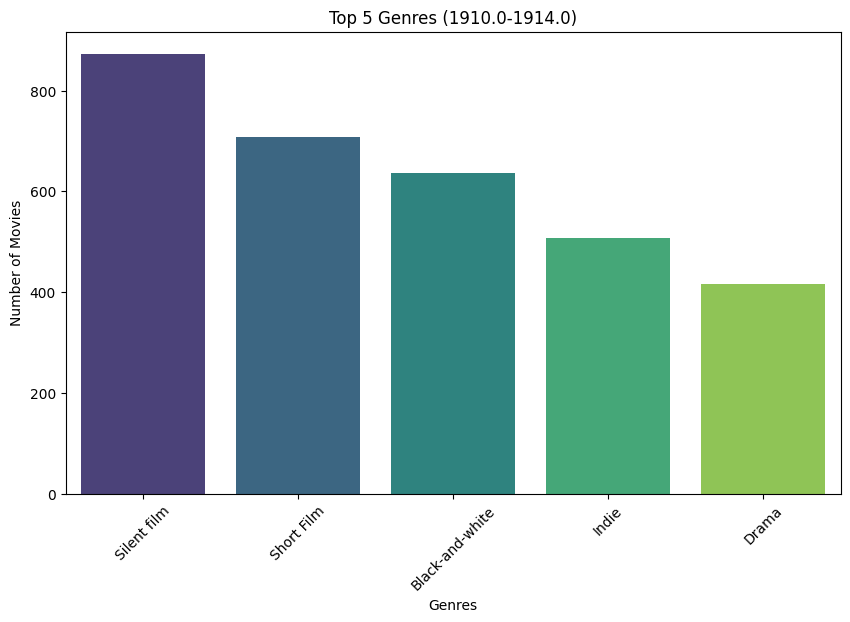

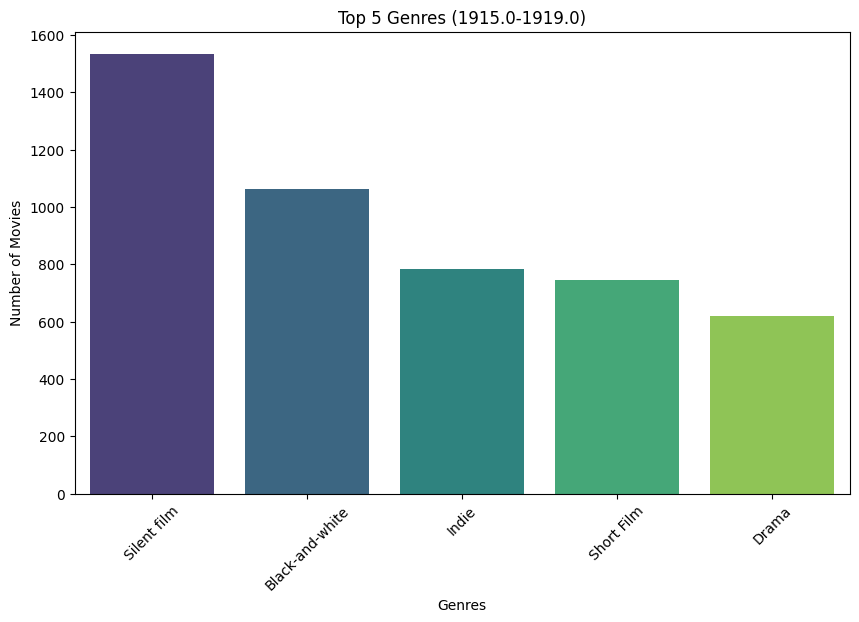

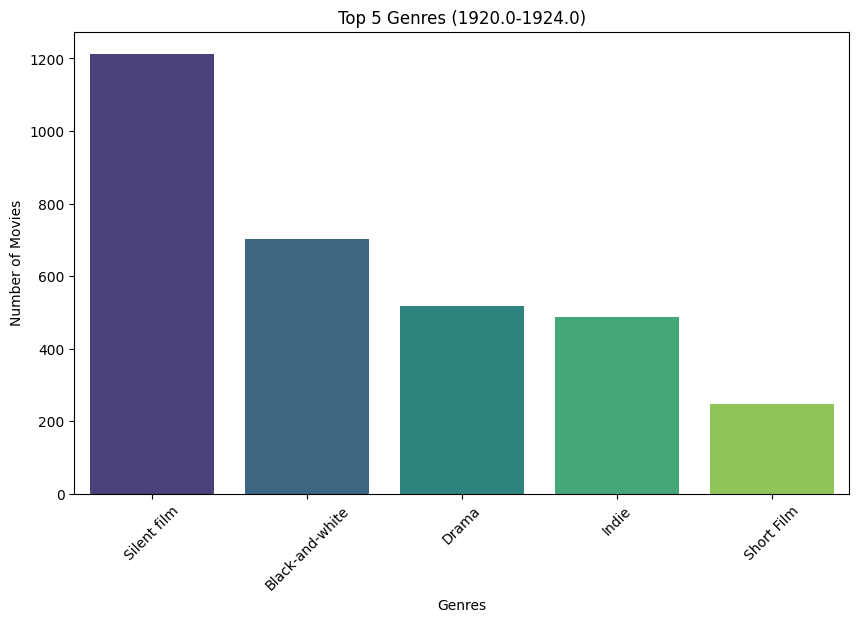

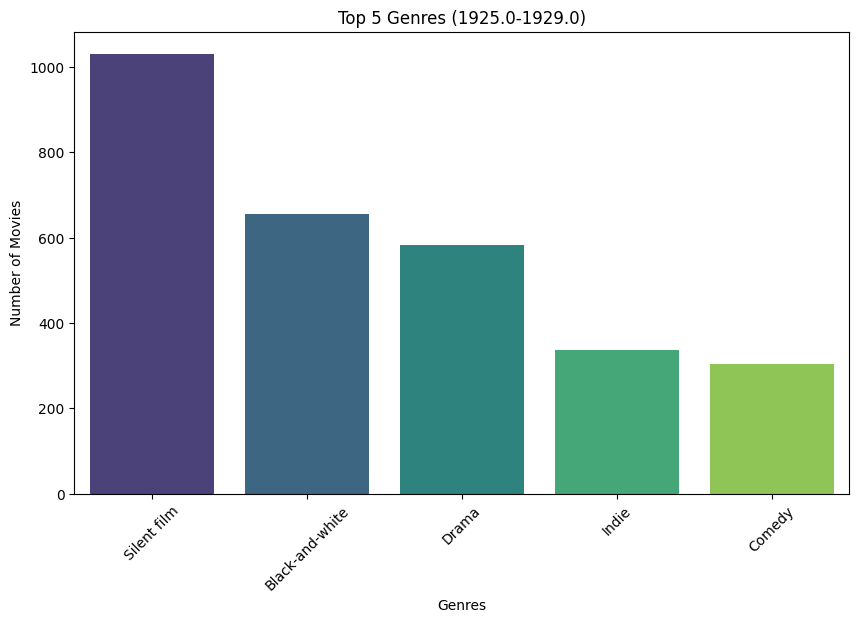

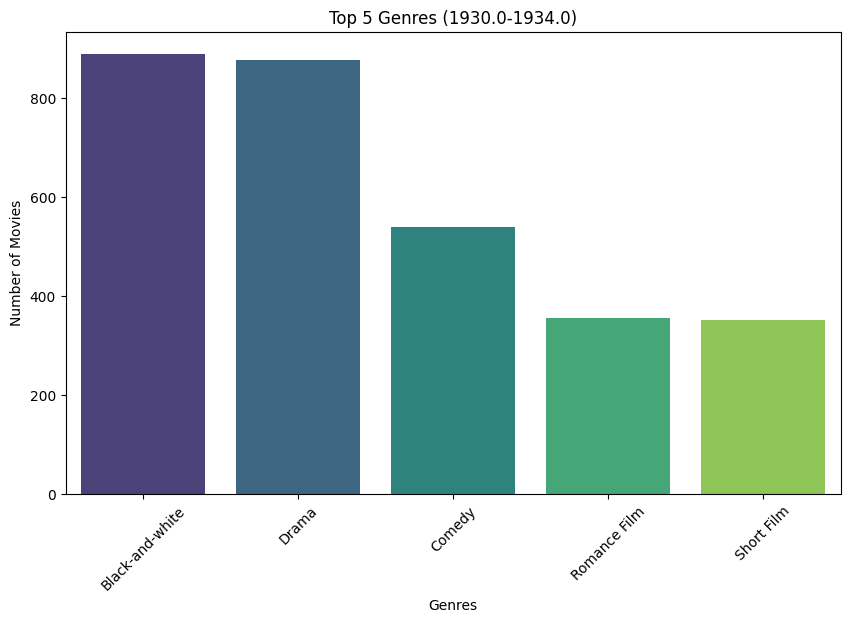

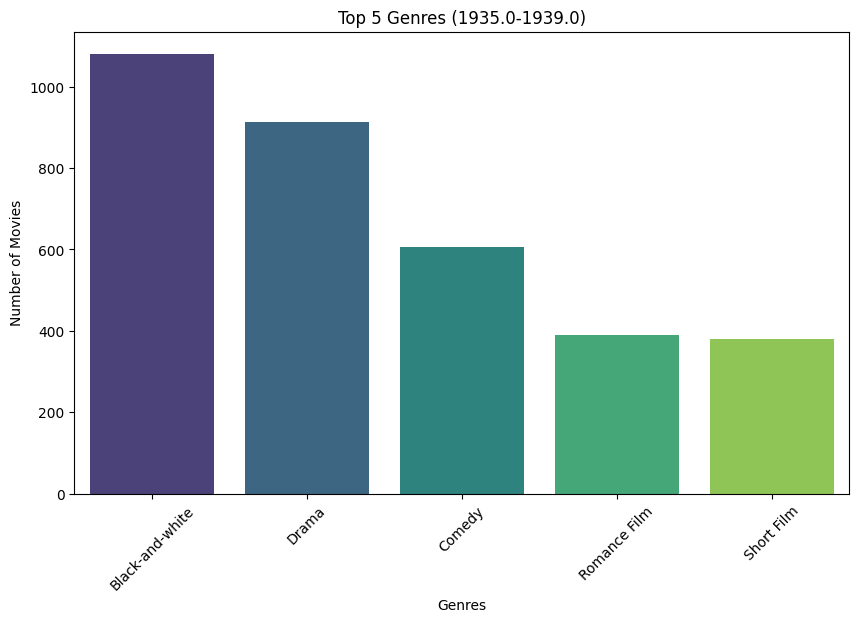

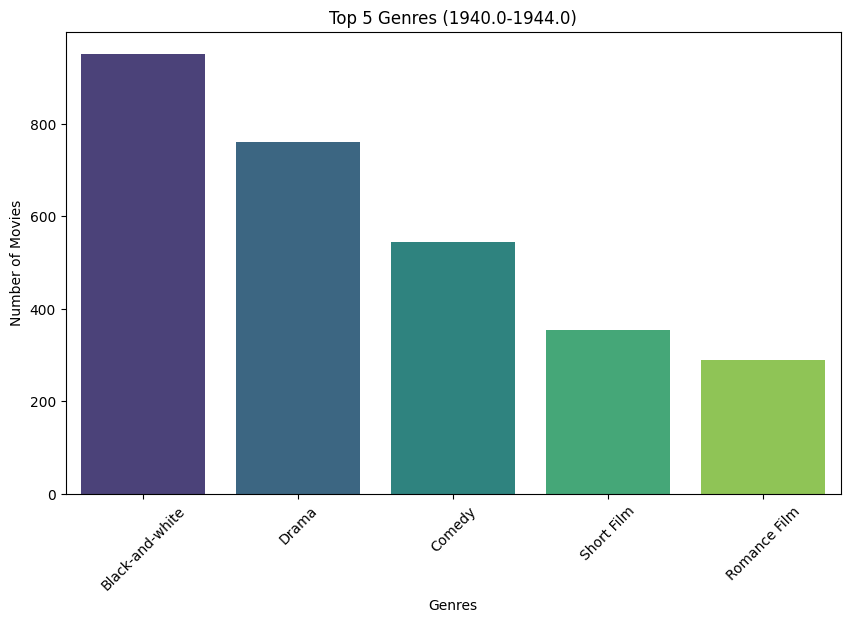

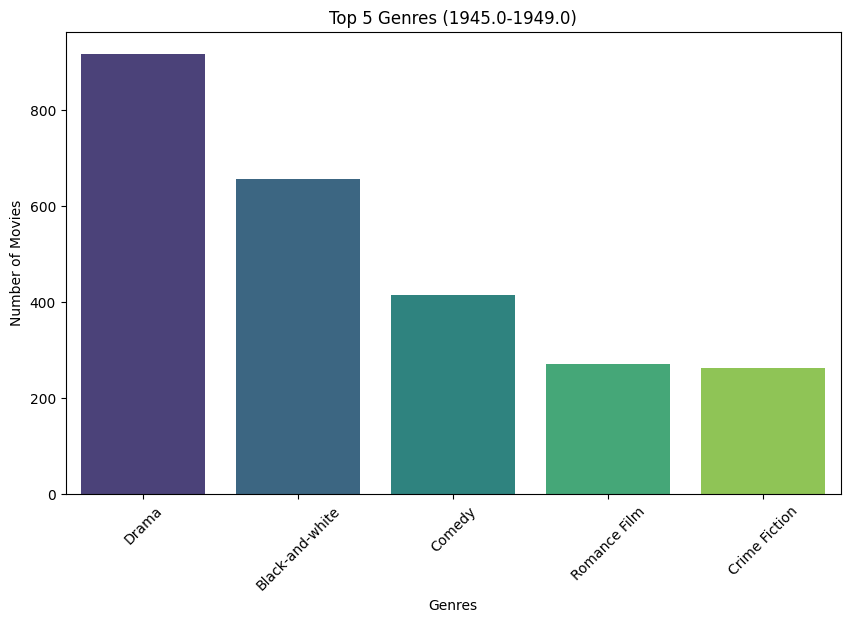

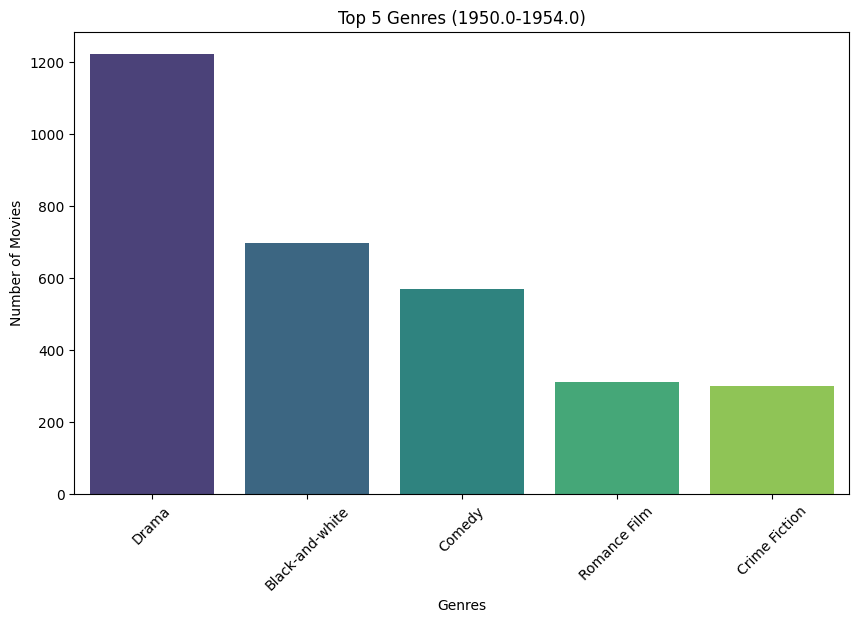

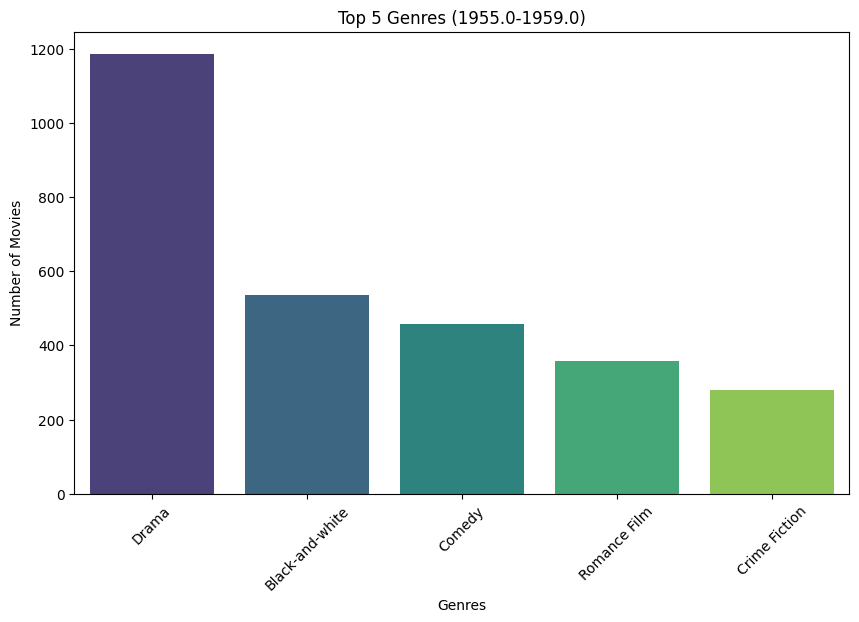

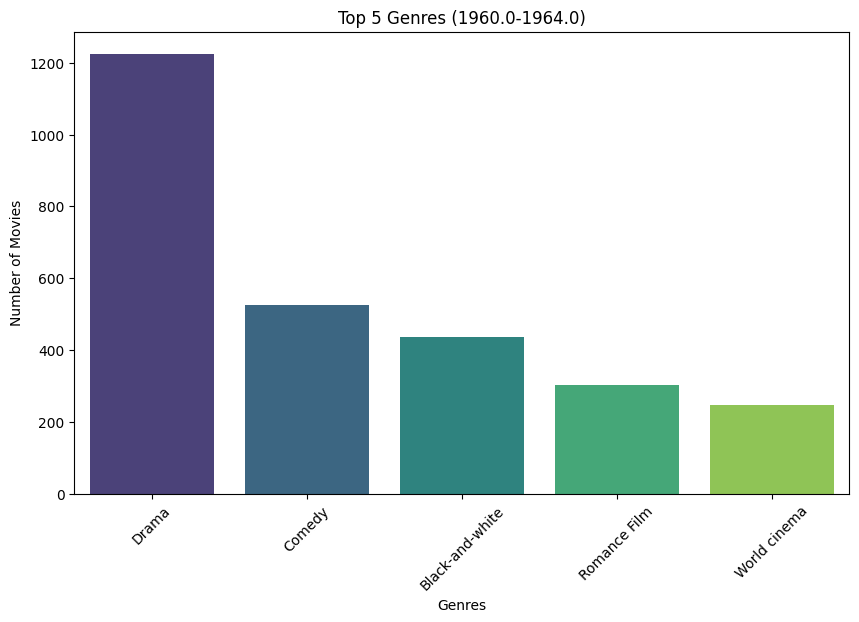

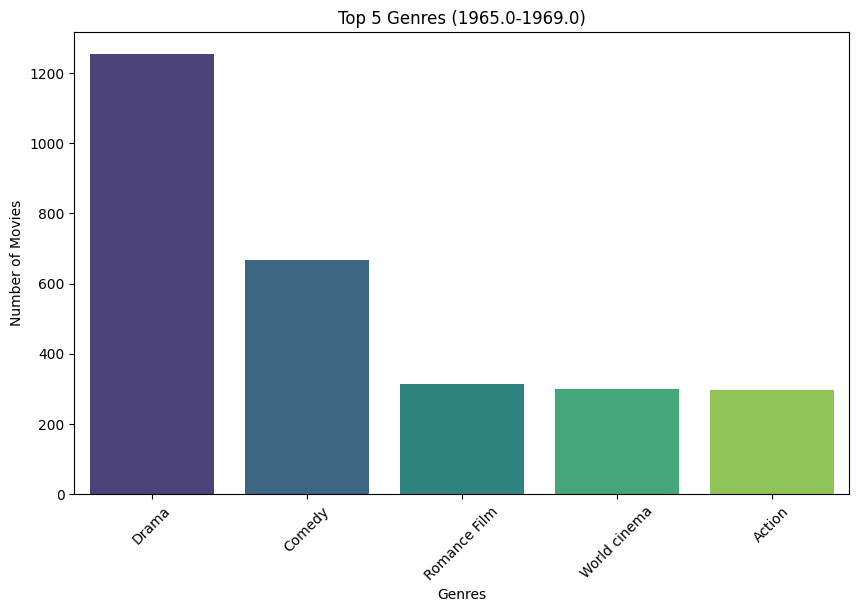

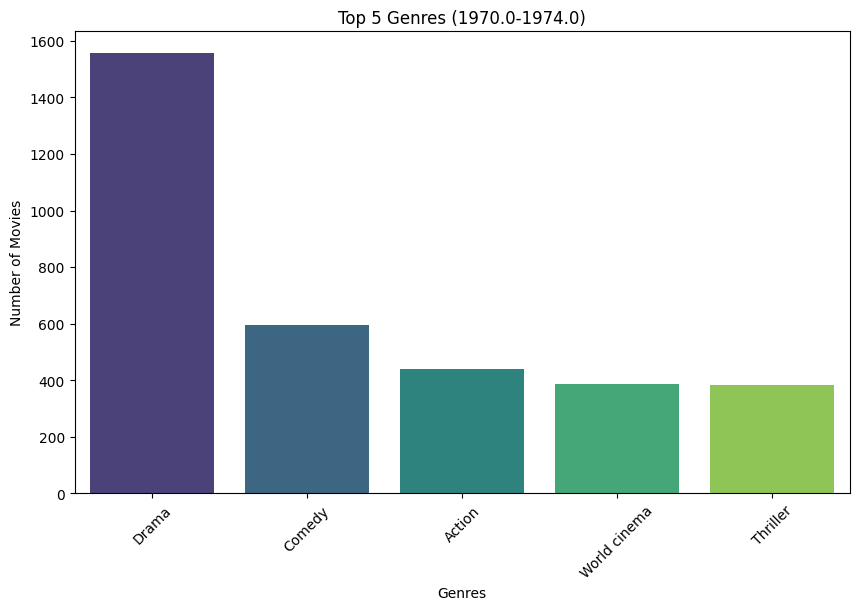

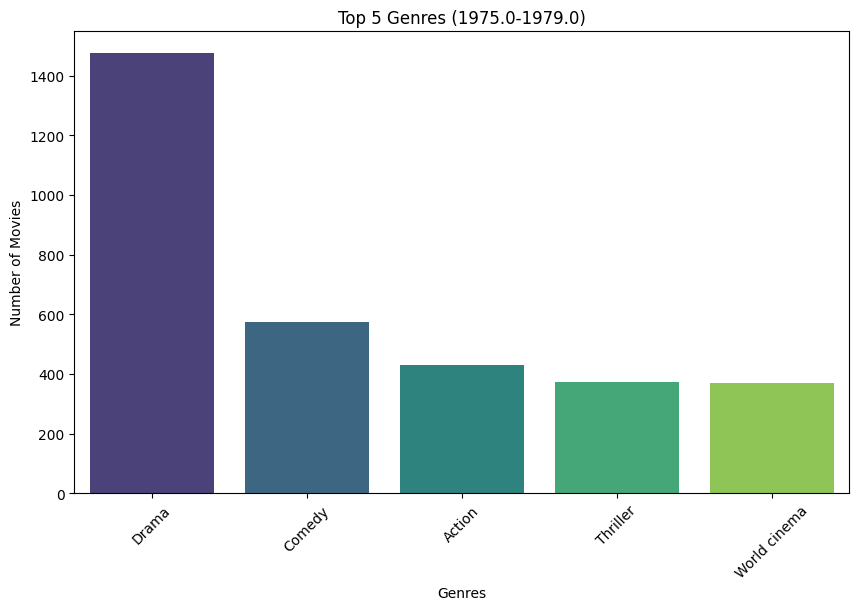

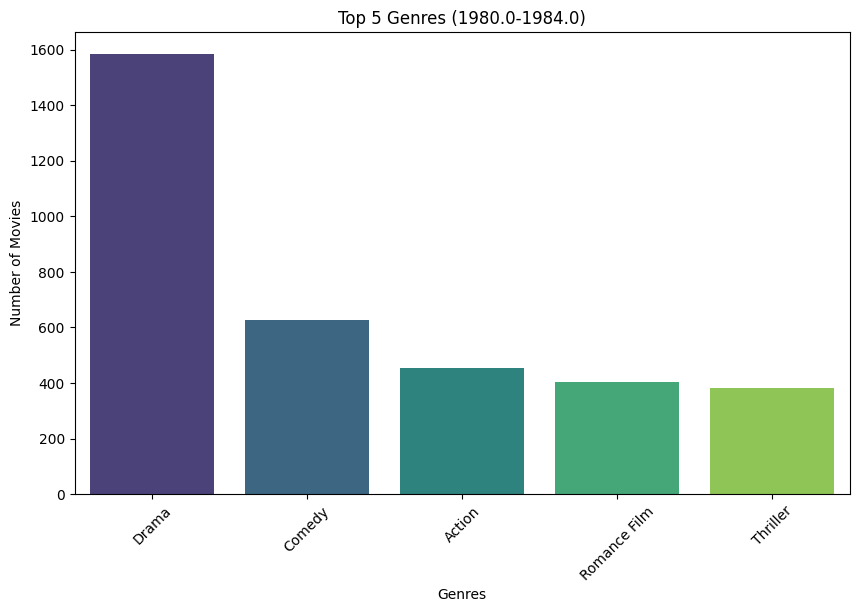

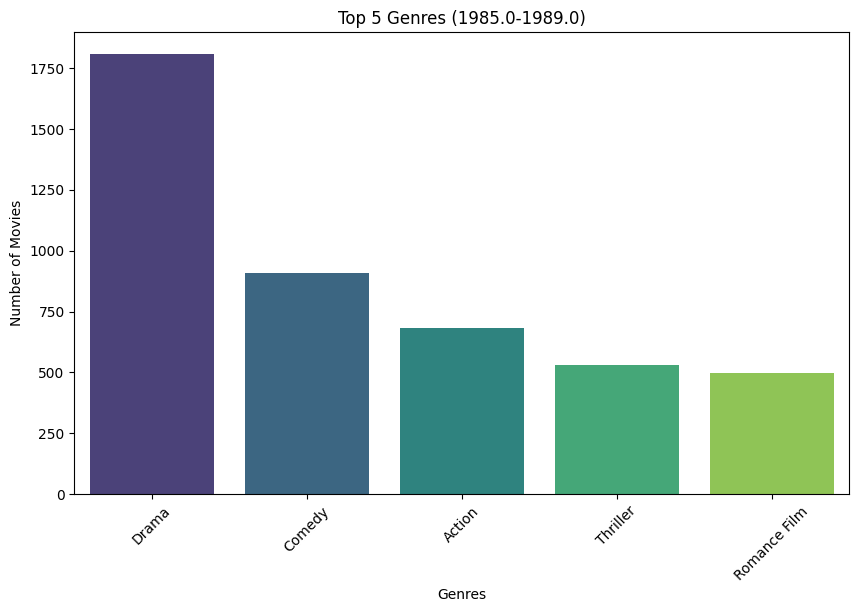

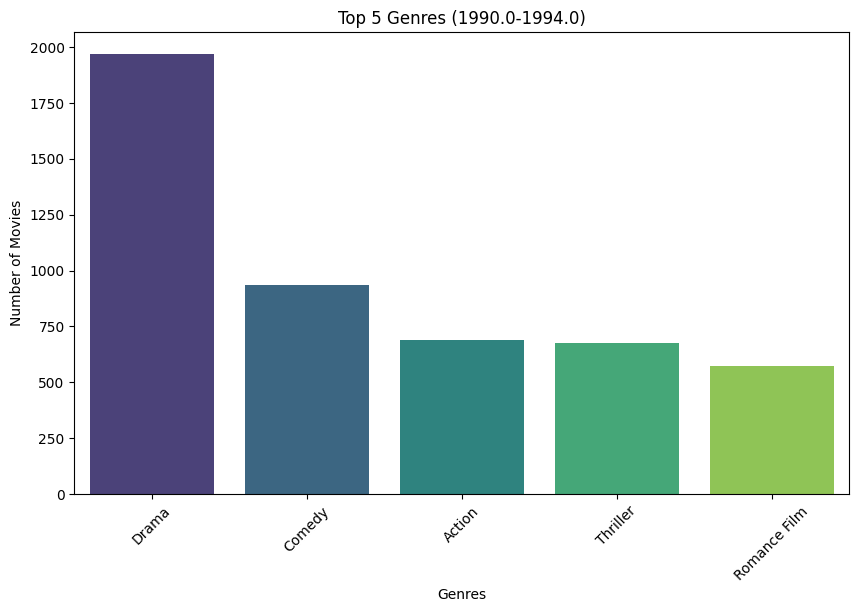

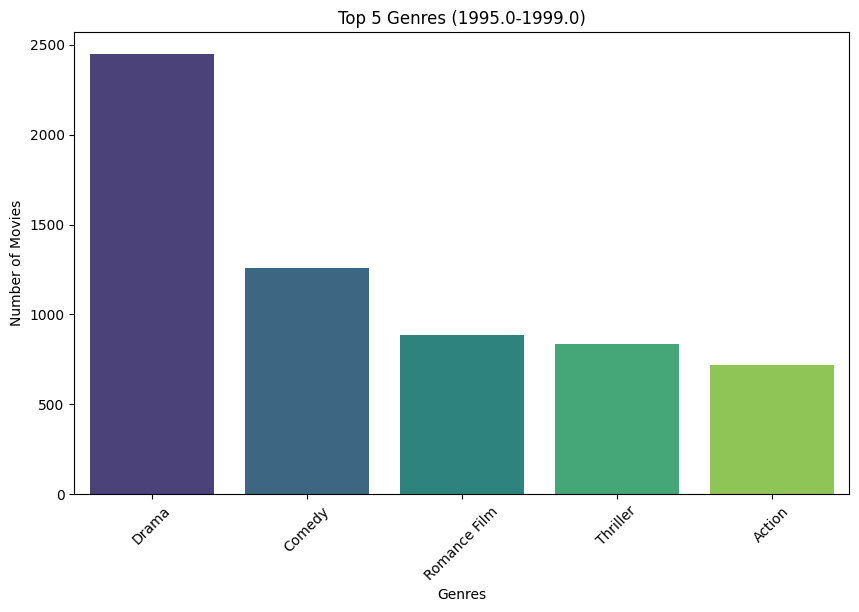

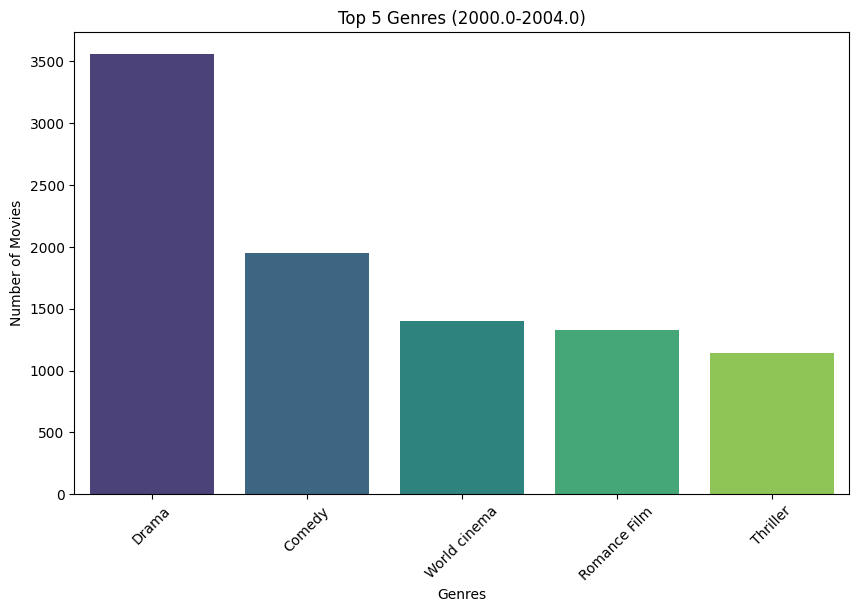

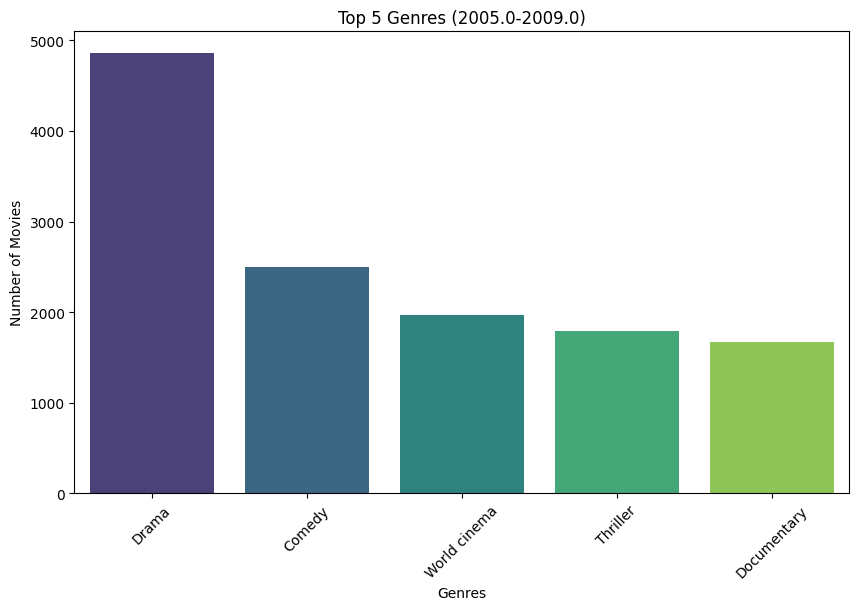

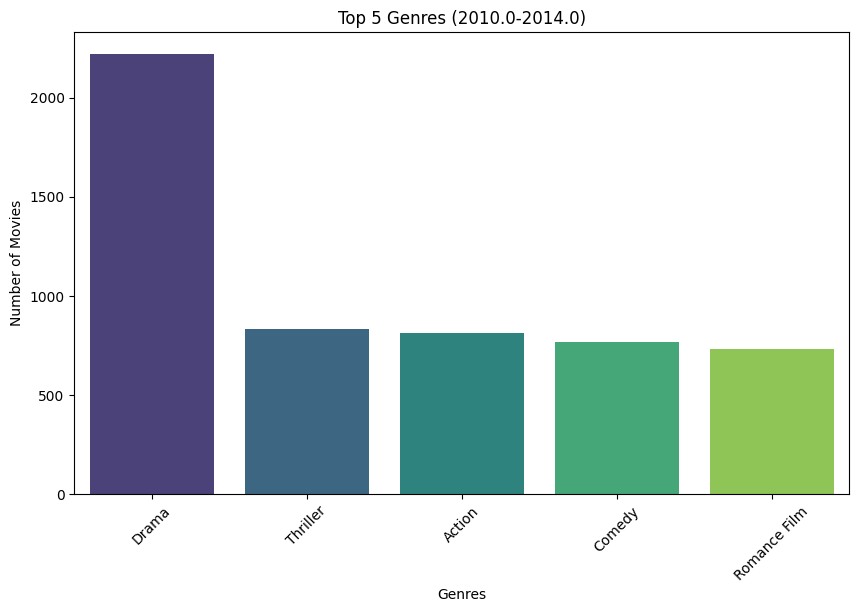

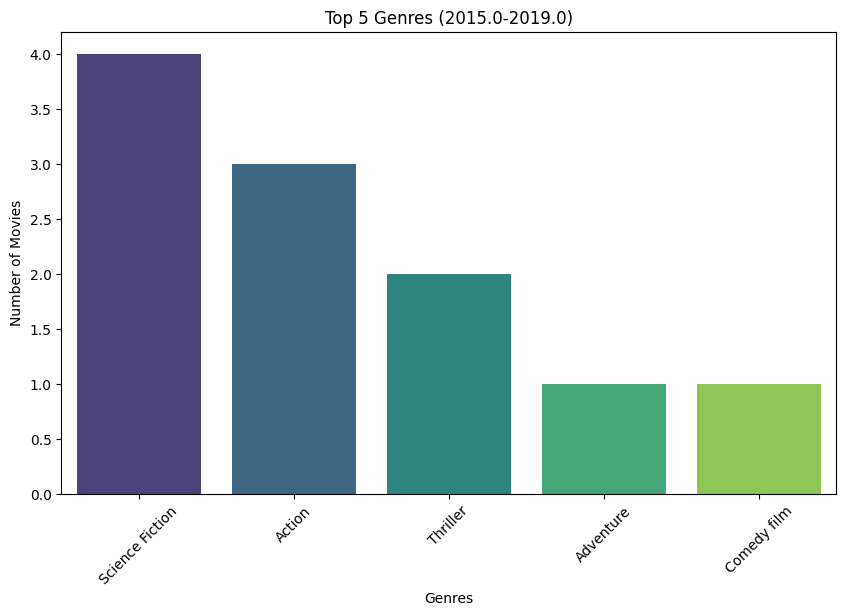

In [25]:
df_exploded['5_year_interval'] = (df_exploded['year'] // 5) * 5
top_genres_per_interval = (df_exploded.groupby(['5_year_interval', 'genre_list'])
                                      .size()
                                      .reset_index(name='count')
                                      .sort_values(by=['5_year_interval', 'count'], ascending=[True, False])
                                      .groupby('5_year_interval')
                                      .head(5))
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique 5-year intervals for iteration
intervals = top_genres_per_interval['5_year_interval'].unique()

for interval in intervals:
    # Filter data for the current interval
    interval_data = top_genres_per_interval[top_genres_per_interval['5_year_interval'] == interval]
    
    # Skip the iteration if there's no data for the current interval
    if interval_data.empty:
        continue
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=interval_data, x='genre_list', y='count', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Top 5 Genres ({interval}-{interval + 4})')
    plt.ylabel('Number of Movies')
    plt.xlabel('Genres')
    plt.show()
